# Intro / Pendahuluan

Pada file ini akan dilakukan prediksi S-wave dengan menggunakan parameter Depth, GR, RHOB, NPHI, Resistivity, P-wave log yang terkoreksi chekshot

Data yang akan dipakai merupakan well yang memiliki DTS yang valid dan bukan sintetik yang kemudian untuk keperluan training dan test machine learning ini, adapun data well yang dipakai ada 4 well, berikut rincian well tersebut:
- Well ABG-01 --> 9172 row = 64,204 data
- Well ABG-03 --> 2246 row = 15,722 data
- Well WGT-01 --> 8382 row = 58,674 data
- Well CMT-19 --> 4778 row = 33,446 data

==> Toatal lebih dari 172.000 data yang di proses

Berdasarkan data yang tersedia, untuk melakukan testing test akan dilakukan 2 pendekatan:
- Metode 1 : Menggunakan split Test-Train secara random dengan ratio 20:80
            => sekitar 34.000 data (20%) dari keseluruhan data dijadikan data test
- Metode 2 : Menggunakan seluruh well ABG-03 sebagai "test well"
            => sekitar 15.000 data (8~10%) dari keseluruhan data dijadikan data test

# Part 1: Data Analysis (well)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

- WELL ABG-01 =====================================================================================================

In [2]:
df1 = pd.read_excel('E:\Dokumen Faris\\Programing\\Untuk TA\\Log GR Dens Res DT DTS- ABG 1.xlsx')
df1[df1==-999.2500]=np.nan
df1

Depth      GR  Density  NPHI  Resistivity   P-wave   S-wave
0     1702.05   49.32     2.64  0.63         0.21  2783.93  1159.29
1     1702.20   56.17     2.43  0.59         0.47  2801.78  1153.96
2     1702.35   58.62     2.32  0.52         0.78  2885.93  1220.24
3     1702.50   55.75     2.24  0.48         1.12  2907.53  1327.13
4     1702.65   54.14     2.26  0.48         1.34  2930.93  1385.73
...       ...     ...      ...   ...          ...      ...      ...
9168  3077.25  108.66     2.63  0.24         7.24  3637.13  1992.16
9169  3077.40  109.86     2.65  0.25         7.25  3634.30  1992.16
9170  3077.55  108.99     2.65  0.25         8.02  3634.30  1992.16
9171  3077.70  114.11     2.65  0.24         7.80  3634.30  1992.16
9172  3077.85  111.58     2.63  0.25         7.19  3634.30  1992.16

[9173 rows x 7 columns]

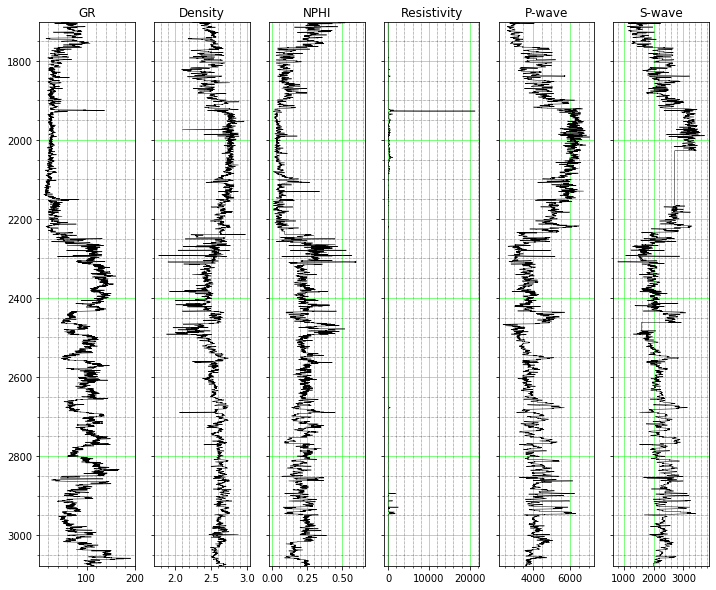

In [3]:
# visualisasi untuk QC data
data = df1.values
kolom = ['GR', 'Density','NPHI','Resistivity','P-wave','S-wave']
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    ax[i].plot(data[:, i+1], data[:,0], linewidth = '0.5',color='black')
    ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
    ax[i].set_title('%s' % kolom[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

input ulang dengan data yang sudah dikondisi

In [4]:
df1 = pd.read_excel('E:\Dokumen Faris\\Programing\\Untuk TA\\Log GR Dens Res DT DTS- ABG 1e.xlsx')
df1[df1==-999.2500]=np.nan
df1

Depth      GR  Density  NPHI  Resistivity   P-wave   S-wave
0     1702.05   49.32     2.64  0.63         0.21  2783.93  1159.29
1     1702.20   56.17     2.43  0.59         0.47  2801.78  1153.96
2     1702.35   58.62     2.32  0.52         0.78  2885.93  1220.24
3     1702.50   55.75     2.24  0.48         1.12  2907.53  1327.13
4     1702.65   54.14     2.26  0.48         1.34  2930.93  1385.73
...       ...     ...      ...   ...          ...      ...      ...
8093  3077.25  108.66     2.63  0.24         7.24  3637.13  1992.16
8094  3077.40  109.86     2.65  0.25         7.25  3634.30  1992.16
8095  3077.55  108.99     2.65  0.25         8.02  3634.30  1992.16
8096  3077.70  114.11     2.65  0.24         7.80  3634.30  1992.16
8097  3077.85  111.58     2.63  0.25         7.19  3634.30  1992.16

[8098 rows x 7 columns]

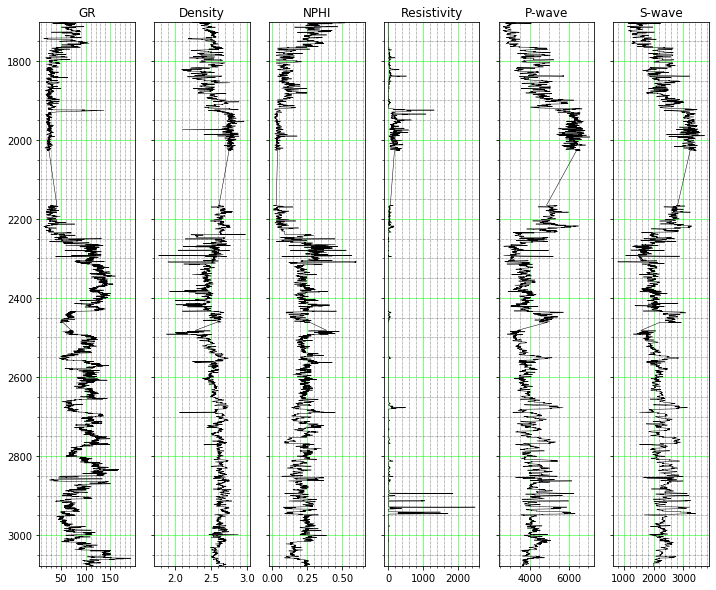

In [5]:
# visualisasi untuk QC data
data = df1.values
kolom = ['GR', 'Density','NPHI','Resistivity','P-wave','S-wave']
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    ax[i].plot(data[:, i+1], data[:,0], linewidth = '0.5',color='black')
    ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
    ax[i].set_title('%s' % kolom[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [6]:
plt.figure(figsize=(15,6))
df1.corr()['S-wave'].sort_values().plot(kind='bar')

WELL ABG - 03 =====================================================================================================

In [7]:
df2 = pd.read_excel('E:\Dokumen Faris\\Programing\\Untuk TA\\Log GR Dens Res DT DTS- ABG 3e.xlsx')
df2[df2==-999.2500]=np.nan
df2

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0     1435.10  119.69     2.48  0.35         1.03  2494.884178  2595.651441
1     1435.25  121.52     2.48  0.37         1.03  2500.615309  2607.297046
2     1435.40  122.15     2.48  0.35         1.02  2515.266546  2605.752961
3     1435.55  124.48     2.48  0.34         1.00  2524.223602  2597.402597
4     1435.70  123.42     2.48  0.33         0.99  2525.478499  2557.714665
...       ...     ...      ...   ...          ...          ...          ...
2209  1766.45   86.88     2.47  0.15         4.32  3543.362009  1963.909966
2210  1766.60   90.31     2.50  0.15         3.77  3579.985906  1963.534362
2211  1766.75   87.03     2.54  0.15         3.45  3635.496183  1963.409192
2212  1766.90   82.89     2.60  0.14         4.13  3708.480350  1963.659547
2213  1767.05   80.01     2.65  0.13         5.60  3858.716293  1963.659547

[2214 rows x 7 columns]

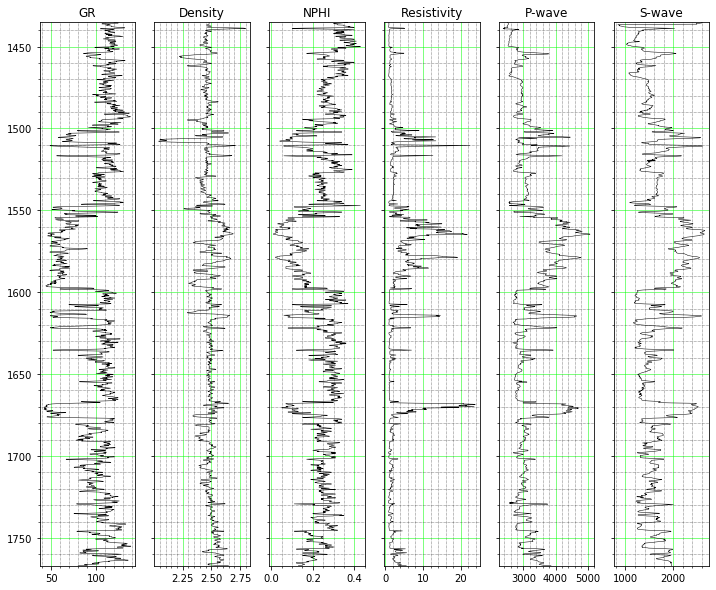

In [8]:
# visualisasi untuk QC data
data = df2.values
kolom = ['GR', 'Density','NPHI','Resistivity','P-wave','S-wave']
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    ax[i].plot(data[:, i+1], data[:,0], linewidth = '0.5',color='black')
    ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
    ax[i].set_title('%s' % kolom[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

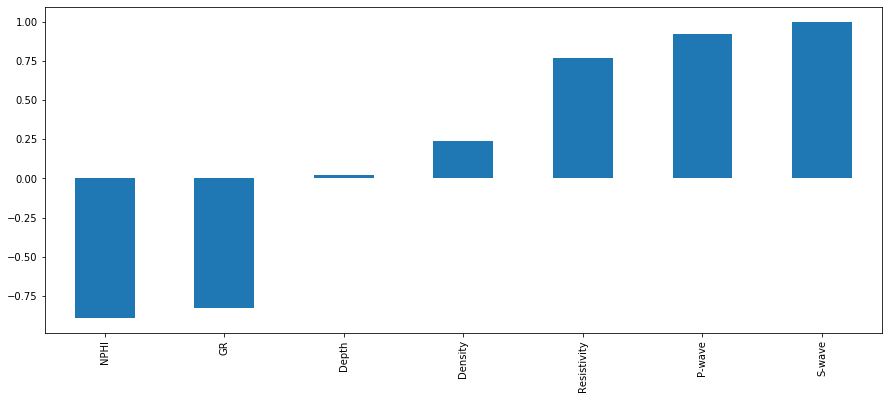

In [9]:
plt.figure(figsize=(15,6))
df2.corr()['S-wave'].sort_values().plot(kind='bar')

WELL WGT - 01 =====================================================================================================

In [10]:
df3 = pd.read_excel('E:\Dokumen Faris\\Programing\\Untuk TA\\Log GR Dens Res DT DTS- WGT 1e.xlsx')
df3[df3==-999.2500]=np.nan
df3

Depth     GR  Density  NPHI  Resistivity       P-wave       S-wave
0     1284.12  89.57     1.57  1.07         0.60  2087.671233  2266.845158
1     1284.27  92.39     1.57  1.00         0.60  2200.722022  2335.811173
2     1284.43  99.56     1.57  0.93         0.59  2196.123640  2352.214848
3     1284.58  90.47     1.57  0.86         0.59  2221.412433  2413.875030
4     1284.73  83.86     1.57  0.79         0.59  2248.616747  2373.277272
...       ...    ...      ...   ...          ...          ...          ...
8359  2688.79  70.23     2.59  0.17         4.59  3590.528920  1998.688525
8360  2688.95  70.65     2.59  0.17         3.79  3590.528920  2091.826230
8361  2689.10  65.24     2.59  0.19         3.32  3629.867810  2143.912218
8362  2689.25  58.32     2.57  0.20         3.56  3477.863989  2139.698140
8363  2689.40  57.01     2.56  0.19         3.68  3531.865585  2162.162162

[8364 rows x 7 columns]

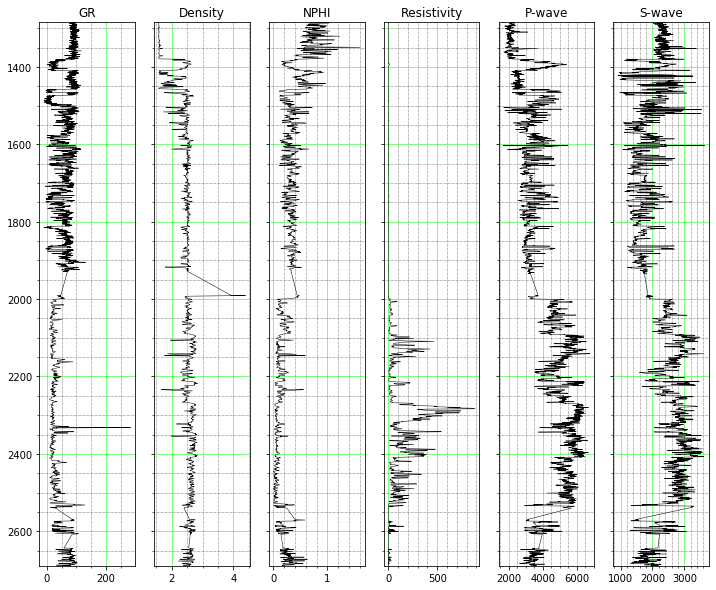

In [11]:
# visualisasi untuk QC data
data = df3.values
kolom = ['GR', 'Density','NPHI','Resistivity','P-wave','S-wave']
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    ax[i].plot(data[:, i+1], data[:,0], linewidth = '0.5',color='black')
    ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
    ax[i].set_title('%s' % kolom[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

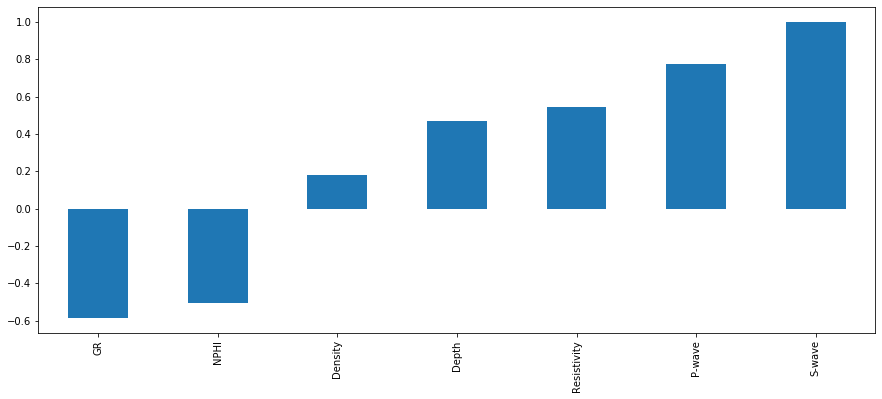

In [12]:
plt.figure(figsize=(15,6))
df3.corr()['S-wave'].sort_values().plot(kind='bar')

WELL CMT-19 =======================================================================================================

In [13]:
df4 = pd.read_excel('E:\Dokumen Faris\\Programing\\Untuk TA\\Log GR Dens Res DT DTS- CMT 19e.xlsx')
df4[df4==-999.2500]=np.nan
df4

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0     2276.7  127.04     2.34  0.33         3.83  3259.195894  1654.453672
1     2276.8  129.41     2.38  0.31         3.27  3165.109034  1658.594983
2     2276.9  123.25     2.46  0.29         2.70  3121.671446  1658.143836
3     2277.0  118.45     2.49  0.29         2.50  3117.839607  1661.216481
4     2277.1  116.16     2.50  0.29         2.43  3132.901634  1662.485001
...      ...     ...      ...   ...          ...          ...          ...
4788  2806.7  143.03     2.48  0.15         3.62  4375.538329  2489.992648
4789  2806.8  134.36     2.47  0.14         3.88  4377.423524  2477.847329
4790  2806.9  134.67     2.47  0.14         4.01  4373.027260  2470.817121
4791  2807.0  138.32     2.46  0.15         4.18  4373.654757  2466.817740
4792  2807.1  145.36     2.46  0.14         3.90  4340.025630  2446.031619

[4793 rows x 7 columns]

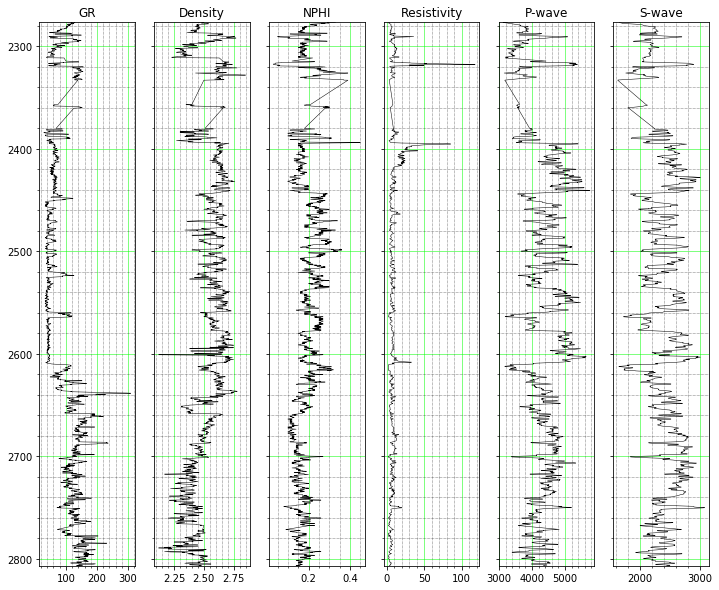

In [14]:
# visualisasi untuk QC data
data = df4.values
kolom = ['GR', 'Density','NPHI','Resistivity','P-wave','S-wave']
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    ax[i].plot(data[:, i+1], data[:,0], linewidth = '0.5',color='black')
    ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
    ax[i].set_title('%s' % kolom[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

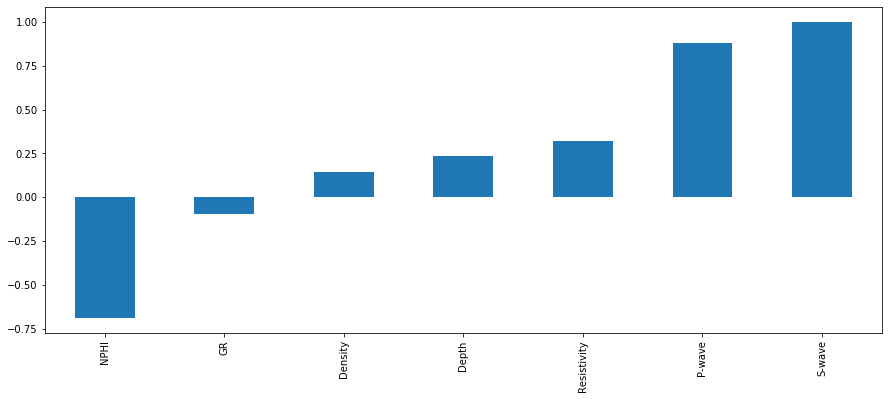

In [15]:
plt.figure(figsize=(15,6))
df4.corr()['S-wave'].sort_values().plot(kind='bar')

# Part 2A : Data Analysis (Merged) - Random Split

- Akan menggabungkan seluruh df dari ke 4 well menjadi "dfg1"
- Kemudian "dfg1" akan di split secara random dengan ratio 80:20
- 80% data untuk training dengan dan 20 % untuk test, dengan pemberian nama:
        => Dengan nama "X_train1, X_test1, y_train1, y_test1"

In [16]:
dfg1 = pd.concat([df1, df2, df3, df4])
dfg1.sort_values(by=['Depth'],ascending=True, inplace=True,)
dfg1.reset_index(drop=True, inplace=True)
dfg1

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0      1284.12   89.57     1.57  1.07         0.60  2087.671233  2266.845158
1      1284.27   92.39     1.57  1.00         0.60  2200.722022  2335.811173
2      1284.43   99.56     1.57  0.93         0.59  2196.123640  2352.214848
3      1284.58   90.47     1.57  0.86         0.59  2221.412433  2413.875030
4      1284.73   83.86     1.57  0.79         0.59  2248.616747  2373.277272
...        ...     ...      ...   ...          ...          ...          ...
23464  3077.25  108.66     2.63  0.24         7.24  3637.130000  1992.160000
23465  3077.40  109.86     2.65  0.25         7.25  3634.300000  1992.160000
23466  3077.55  108.99     2.65  0.25         8.02  3634.300000  1992.160000
23467  3077.70  114.11     2.65  0.24         7.80  3634.300000  1992.160000
23468  3077.85  111.58     2.63  0.25         7.19  3634.300000  1992.160000

[23469 rows x 7 columns]

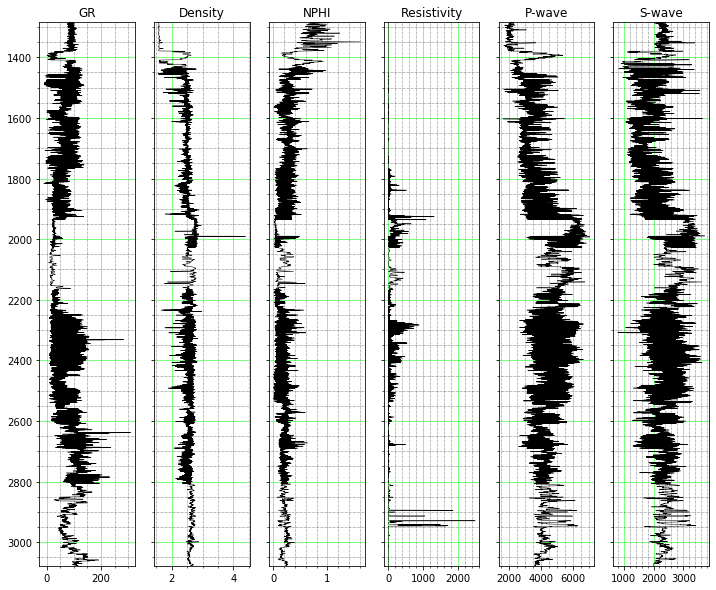

In [17]:
# visualisasi untuk QC data
data = dfg1.values
kolom = ['GR', 'Density','NPHI','Resistivity','P-wave','S-wave']
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    ax[i].plot(data[:, i+1], data[:,0], linewidth = '0.5',color='black')
    ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
    ax[i].set_title('%s' % kolom[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
#cek kelengkapan
dfg1.isnull().sum() #treat false=0, true=1

Depth          0
GR             0
Density        0
NPHI           0
Resistivity    0
P-wave         0
S-wave         0
dtype: int64

In [19]:
#informasi kuantitatif data korelasi
dfg1.corr()

Depth        GR   Density      NPHI  Resistivity    P-wave  \
Depth        1.000000  0.227782  0.425417 -0.397054     0.072738  0.420253   
GR           0.227782  1.000000 -0.216946  0.283982    -0.302554 -0.473720   
Density      0.425417 -0.216946  1.000000 -0.730575     0.252360  0.606843   
NPHI        -0.397054  0.283982 -0.730575  1.000000    -0.334062 -0.766689   
Resistivity  0.072738 -0.302554  0.252360 -0.334062     1.000000  0.522856   
P-wave       0.420253 -0.473720  0.606843 -0.766689     0.522856  1.000000   
S-wave       0.379507 -0.389036  0.280243 -0.537274     0.459127  0.855018   

               S-wave  
Depth        0.379507  
GR          -0.389036  
Density      0.280243  
NPHI        -0.537274  
Resistivity  0.459127  
P-wave       0.855018  
S-wave       1.000000

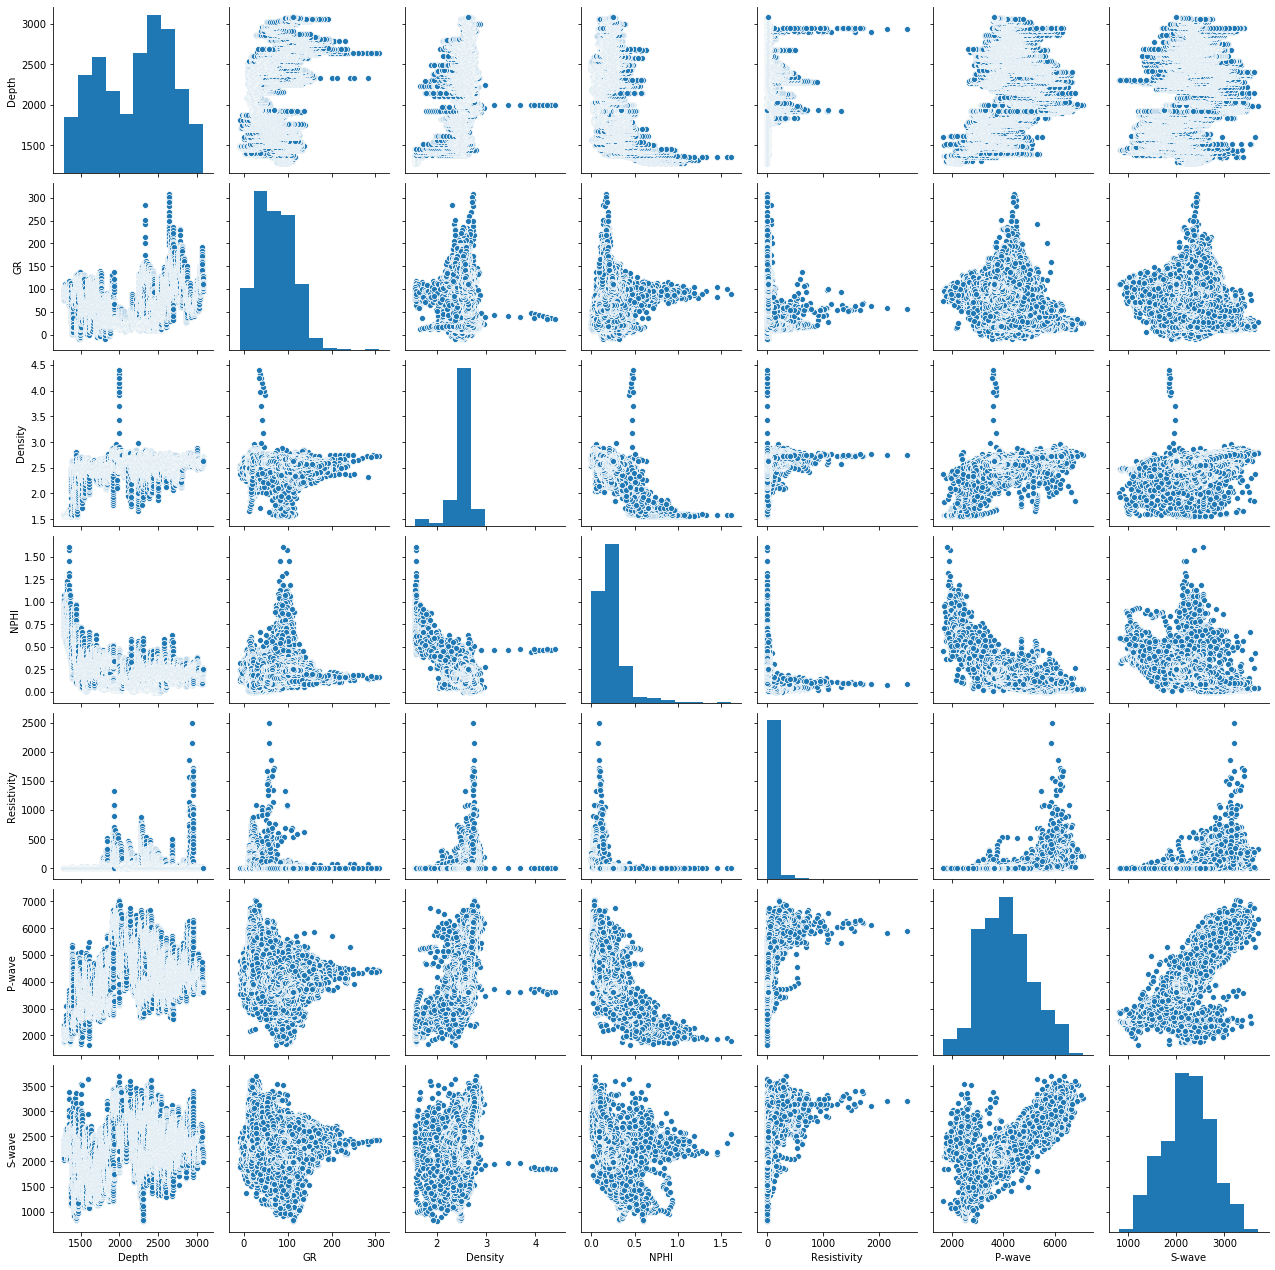

In [20]:
#inforamasi grafik / visual data korelasi
sns.pairplot(dfg1)

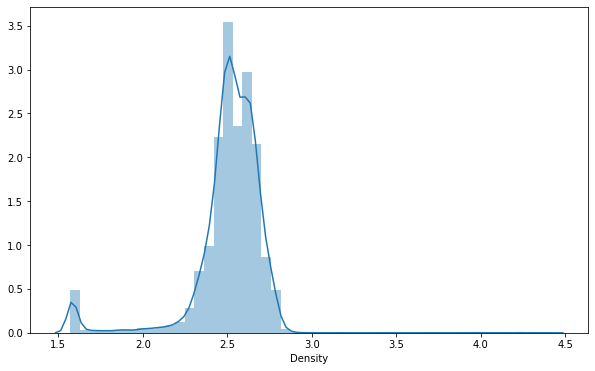

In [21]:
# untuk melihat distributionnya
plt.figure(figsize=(10,6))
sns.distplot(dfg1['Density']) #distribution plot

In [22]:
# informasi korelasi pada S-wave
dfg1.corr()['S-wave'].sort_values()

NPHI          -0.537274
GR            -0.389036
Density        0.280243
Depth          0.379507
Resistivity    0.459127
P-wave         0.855018
S-wave         1.000000
Name: S-wave, dtype: float64

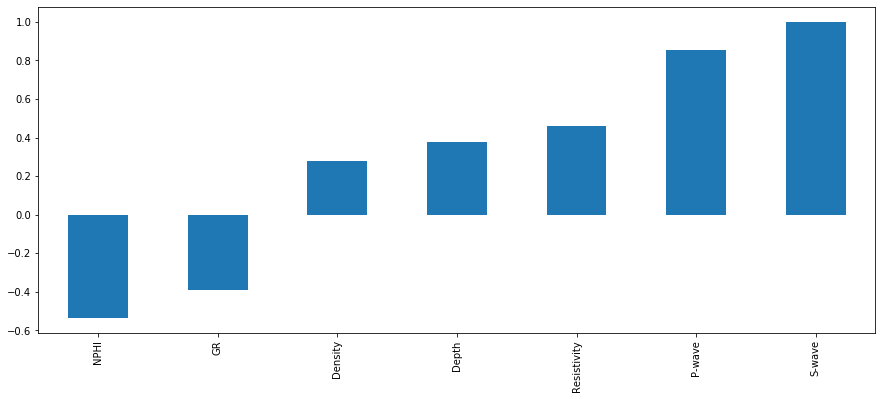

In [23]:
plt.figure(figsize=(15,6))
dfg1.corr()['S-wave'].sort_values().plot(kind='bar')

In [24]:
#Feature Engineering
dfg1 = (dfg1[dfg1['Density'] <= 3 ])
dfg1 = (dfg1[dfg1['Density'] >= 2 ])
dfg1 = (dfg1[dfg1['GR'] <= 150 ])
dfg1 = (dfg1[dfg1['Resistivity'] <= 1000 ])
dfg1.sort_values(by=['Depth'],ascending=True, inplace=True,)
dfg1.reset_index(drop=True, inplace=True)
dfg1

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0      1379.52   86.44     2.04  0.53         1.09  2445.835339  2311.016756
1      1379.68   86.04     2.17  0.48         1.25  2483.095723  2983.263189
2      1379.83   84.61     2.30  0.44         1.41  2757.622365  1186.176837
3      1379.98   81.59     2.43  0.39         1.57  2886.090332  1317.712161
4      1380.13   65.02     2.40  0.40         1.58  3477.863989  1349.448798
...        ...     ...      ...   ...          ...          ...          ...
21963  3077.25  108.66     2.63  0.24         7.24  3637.130000  1992.160000
21964  3077.40  109.86     2.65  0.25         7.25  3634.300000  1992.160000
21965  3077.55  108.99     2.65  0.25         8.02  3634.300000  1992.160000
21966  3077.70  114.11     2.65  0.24         7.80  3634.300000  1992.160000
21967  3077.85  111.58     2.63  0.25         7.19  3634.300000  1992.160000

[21968 rows x 7 columns]

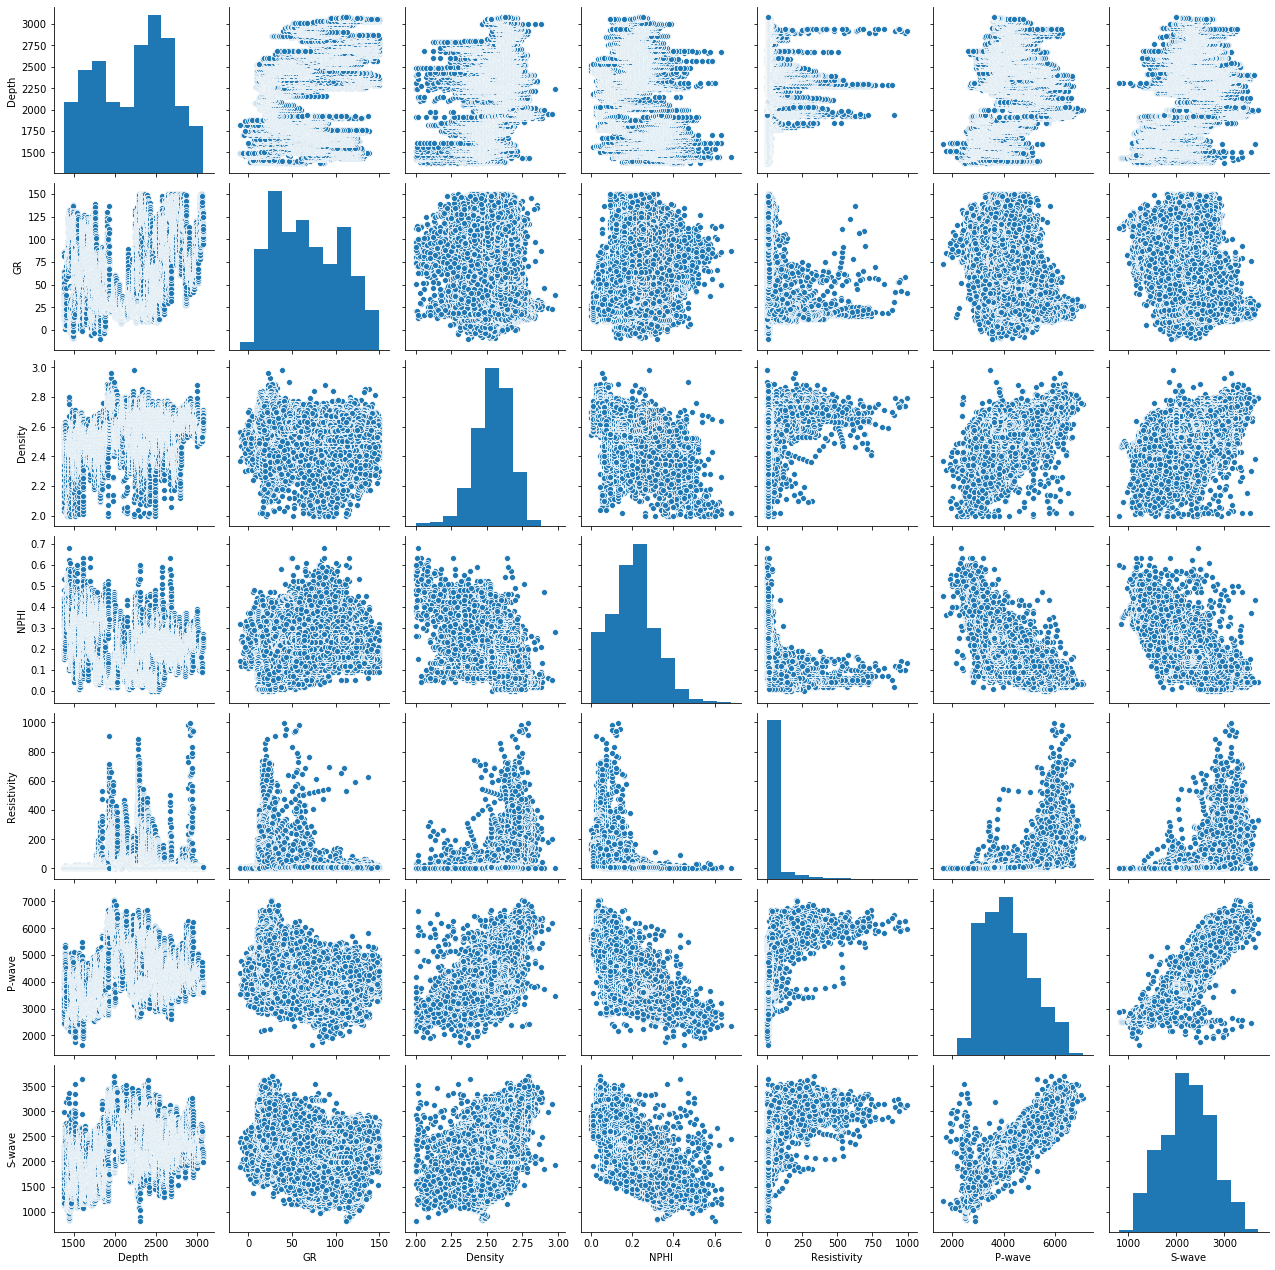

In [25]:
#inforamasi grafik / visual data korelasi
sns.pairplot(dfg1)

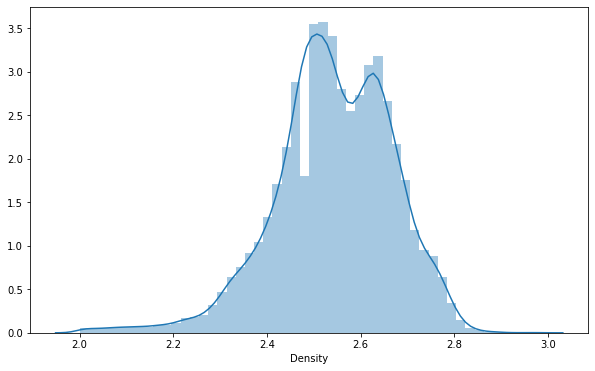

In [26]:
# untuk melihat distributionnya
plt.figure(figsize=(10,6))
sns.distplot(dfg1['Density']) #distribution plot

In [27]:
# informasi korelasi pada S-wave
dfg1.corr()['S-wave'].sort_values()

NPHI          -0.786445
GR            -0.449243
Depth          0.415192
Resistivity    0.512068
Density        0.522476
P-wave         0.936446
S-wave         1.000000
Name: S-wave, dtype: float64

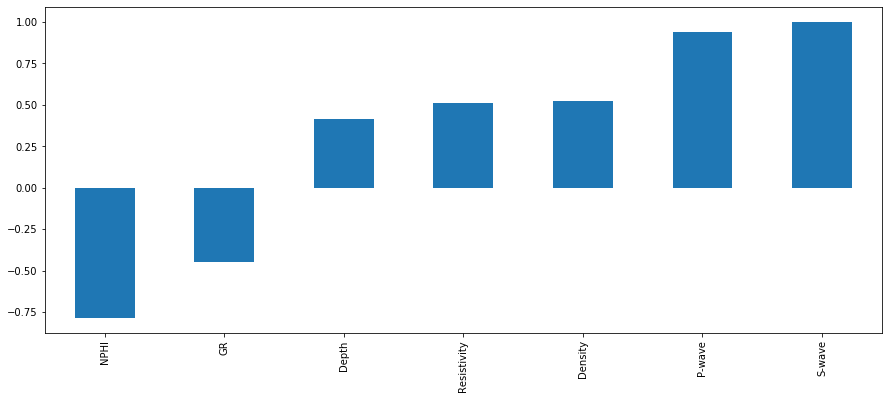

In [28]:
plt.figure(figsize=(15,6))
dfg1.corr()['S-wave'].sort_values().plot(kind='bar')

In [29]:
dfg1.describe() #data analysis

Depth            GR       Density          NPHI   Resistivity  \
count  21968.000000  21968.000000  21968.000000  21968.000000  21968.000000   
mean    2225.521729     68.292602      2.542179      0.203847     32.985257   
std      444.103187     38.023328      0.126310      0.104681     80.934956   
min     1379.520000     -9.950000      2.000000      0.000000      0.100000   
25%     1808.245000     33.247500      2.470000      0.130000      2.780000   
50%     2305.250000     65.325000      2.540000      0.210000      6.490000   
75%     2578.362500    102.202500      2.630000      0.270000     18.412500   
max     3077.850000    150.000000      2.980000      0.680000    994.800000   

             P-wave        S-wave  
count  21968.000000  21968.000000  
mean    4169.662439   2227.175968  
std      947.374948    510.787305  
min     1651.584936    807.410000  
25%     3430.886988   1865.702713  
50%     4052.005000   2234.582053  
75%     4786.432161   2589.469663  
max     7073.900000   3707.560000

# Part 2B : Data Analysis (Merged) - ABG 03 as Test Well

- Akan menggabungkan seluruh df dari ke 3 well (ABG-01, WGT-01, dan CMT-19) menjadi "dfg2"
- Akan tetap mebiarkan "df2" atau well ABG-03 yang bertujuan untuk digunakan sebagai "test well"
- Kemudian "dfg2" dan "df2" karena kondisi sudah terpisah antara train dan test data set maka:
        => Nama feature dan label pada "dfg2" diberi nama "X_train2, y_train2"
        => kemudian nama feature dan label pada "df2" diberi nama "X_test2, y_test2"

In [30]:
dfg2 = pd.concat([df1, df3, df4])
dfg2.sort_values(by=['Depth'],ascending=True, inplace=True,)
dfg2.reset_index(drop=True, inplace=True)
dfg2 

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0      1284.12   89.57     1.57  1.07         0.60  2087.671233  2266.845158
1      1284.27   92.39     1.57  1.00         0.60  2200.722022  2335.811173
2      1284.43   99.56     1.57  0.93         0.59  2196.123640  2352.214848
3      1284.58   90.47     1.57  0.86         0.59  2221.412433  2413.875030
4      1284.73   83.86     1.57  0.79         0.59  2248.616747  2373.277272
...        ...     ...      ...   ...          ...          ...          ...
21250  3077.25  108.66     2.63  0.24         7.24  3637.130000  1992.160000
21251  3077.40  109.86     2.65  0.25         7.25  3634.300000  1992.160000
21252  3077.55  108.99     2.65  0.25         8.02  3634.300000  1992.160000
21253  3077.70  114.11     2.65  0.24         7.80  3634.300000  1992.160000
21254  3077.85  111.58     2.63  0.25         7.19  3634.300000  1992.160000

[21255 rows x 7 columns]

In [31]:
df2

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0     1435.10  119.69     2.48  0.35         1.03  2494.884178  2595.651441
1     1435.25  121.52     2.48  0.37         1.03  2500.615309  2607.297046
2     1435.40  122.15     2.48  0.35         1.02  2515.266546  2605.752961
3     1435.55  124.48     2.48  0.34         1.00  2524.223602  2597.402597
4     1435.70  123.42     2.48  0.33         0.99  2525.478499  2557.714665
...       ...     ...      ...   ...          ...          ...          ...
2209  1766.45   86.88     2.47  0.15         4.32  3543.362009  1963.909966
2210  1766.60   90.31     2.50  0.15         3.77  3579.985906  1963.534362
2211  1766.75   87.03     2.54  0.15         3.45  3635.496183  1963.409192
2212  1766.90   82.89     2.60  0.14         4.13  3708.480350  1963.659547
2213  1767.05   80.01     2.65  0.13         5.60  3858.716293  1963.659547

[2214 rows x 7 columns]

dfg2 analysis =====================================================================================================

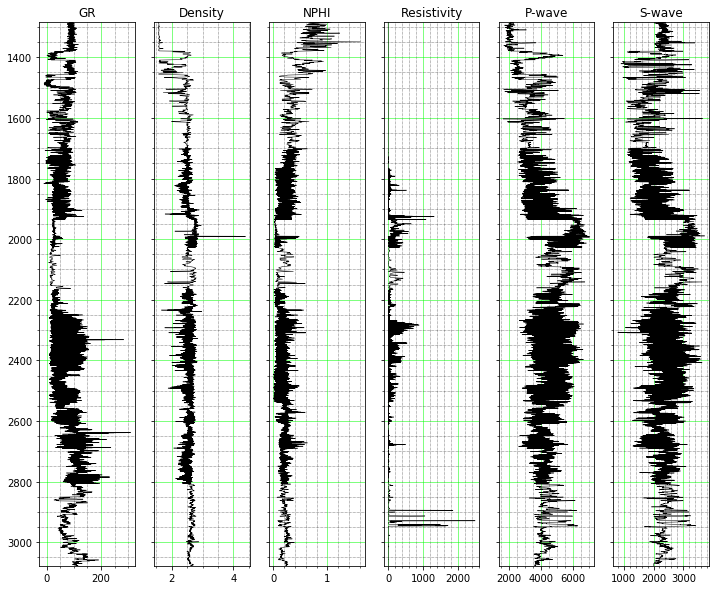

In [32]:
# visualisasi untuk QC data
data = dfg2.values
kolom = ['GR', 'Density','NPHI','Resistivity','P-wave','S-wave']
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    ax[i].plot(data[:, i+1], data[:,0], linewidth = '0.5',color='black')
    ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
    ax[i].set_title('%s' % kolom[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [33]:
#cek kelengkapan
dfg2.isnull().sum() #treat false=0, true=1

Depth          0
GR             0
Density        0
NPHI           0
Resistivity    0
P-wave         0
S-wave         0
dtype: int64

In [34]:
#informasi kuantitatif data korelasi
dfg2.corr()

Depth        GR   Density      NPHI  Resistivity    P-wave  \
Depth        1.000000  0.364470  0.452752 -0.428987     0.032335  0.343925   
GR           0.364470  1.000000 -0.218112  0.267059    -0.291698 -0.427918   
Density      0.452752 -0.218112  1.000000 -0.741041     0.250927  0.630886   
NPHI        -0.428987  0.267059 -0.741041  1.000000    -0.336507 -0.792208   
Resistivity  0.032335 -0.291698  0.250927 -0.336507     1.000000  0.523775   
P-wave       0.343925 -0.427918  0.630886 -0.792208     0.523775  1.000000   
S-wave       0.272041 -0.320342  0.290939 -0.554754     0.466704  0.838380   

               S-wave  
Depth        0.272041  
GR          -0.320342  
Density      0.290939  
NPHI        -0.554754  
Resistivity  0.466704  
P-wave       0.838380  
S-wave       1.000000

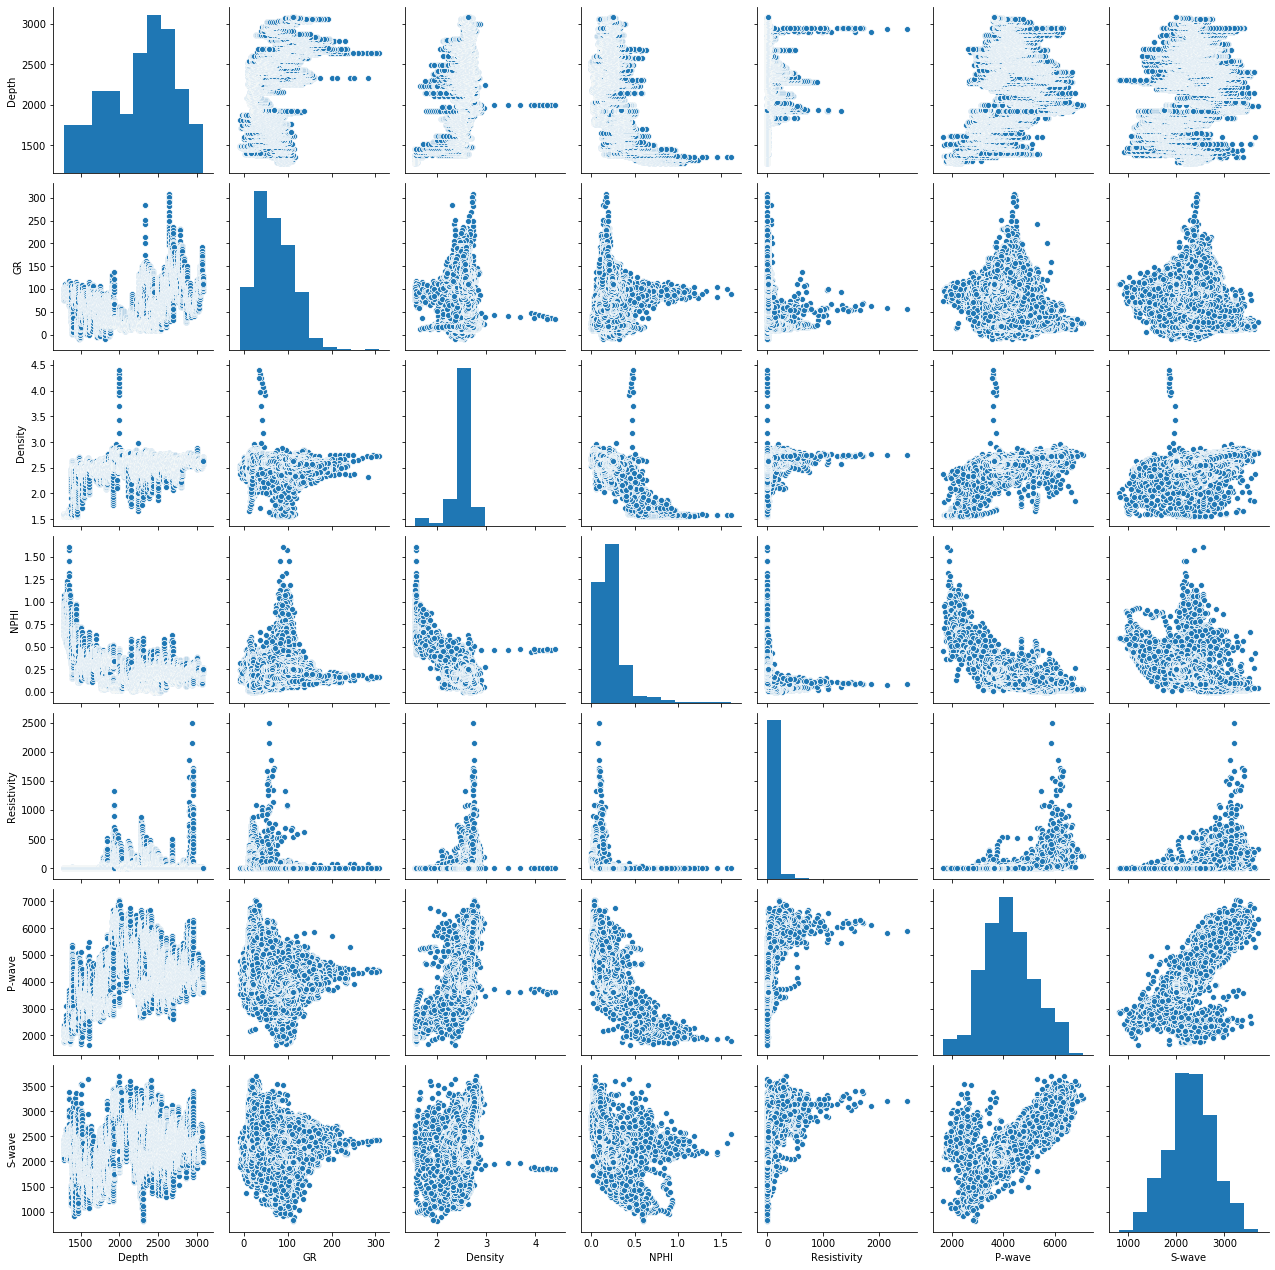

In [35]:
#inforamasi grafik / visual data korelasi
sns.pairplot(dfg2)

In [36]:
# informasi korelasi pada S-wave
dfg2.corr()['S-wave'].sort_values()

NPHI          -0.554754
GR            -0.320342
Depth          0.272041
Density        0.290939
Resistivity    0.466704
P-wave         0.838380
S-wave         1.000000
Name: S-wave, dtype: float64

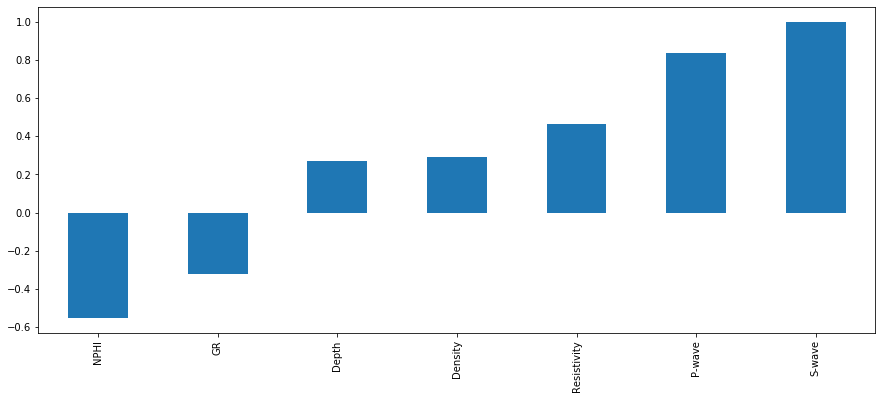

In [37]:
plt.figure(figsize=(15,6))
dfg2.corr()['S-wave'].sort_values().plot(kind='bar')

In [38]:
#Feature Engineering
dfg2 = (dfg2[dfg2['Density'] <= 3 ])
dfg2 = (dfg2[dfg2['Density'] >= 2 ])
dfg2 = (dfg2[dfg2['GR'] <= 150 ])
dfg2 = (dfg2[dfg2['Resistivity'] <= 1000])
dfg2.sort_values(by=['Depth'],ascending=True, inplace=True,)
dfg2.reset_index(drop=True, inplace=True)
dfg2

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0      1379.52   86.44     2.04  0.53         1.09  2445.835339  2311.016756
1      1379.68   86.04     2.17  0.48         1.25  2483.095723  2983.263189
2      1379.83   84.61     2.30  0.44         1.41  2757.622365  1186.176837
3      1379.98   81.59     2.43  0.39         1.57  2886.090332  1317.712161
4      1380.13   65.02     2.40  0.40         1.58  3477.863989  1349.448798
...        ...     ...      ...   ...          ...          ...          ...
19749  3077.25  108.66     2.63  0.24         7.24  3637.130000  1992.160000
19750  3077.40  109.86     2.65  0.25         7.25  3634.300000  1992.160000
19751  3077.55  108.99     2.65  0.25         8.02  3634.300000  1992.160000
19752  3077.70  114.11     2.65  0.24         7.80  3634.300000  1992.160000
19753  3077.85  111.58     2.63  0.25         7.19  3634.300000  1992.160000

[19754 rows x 7 columns]

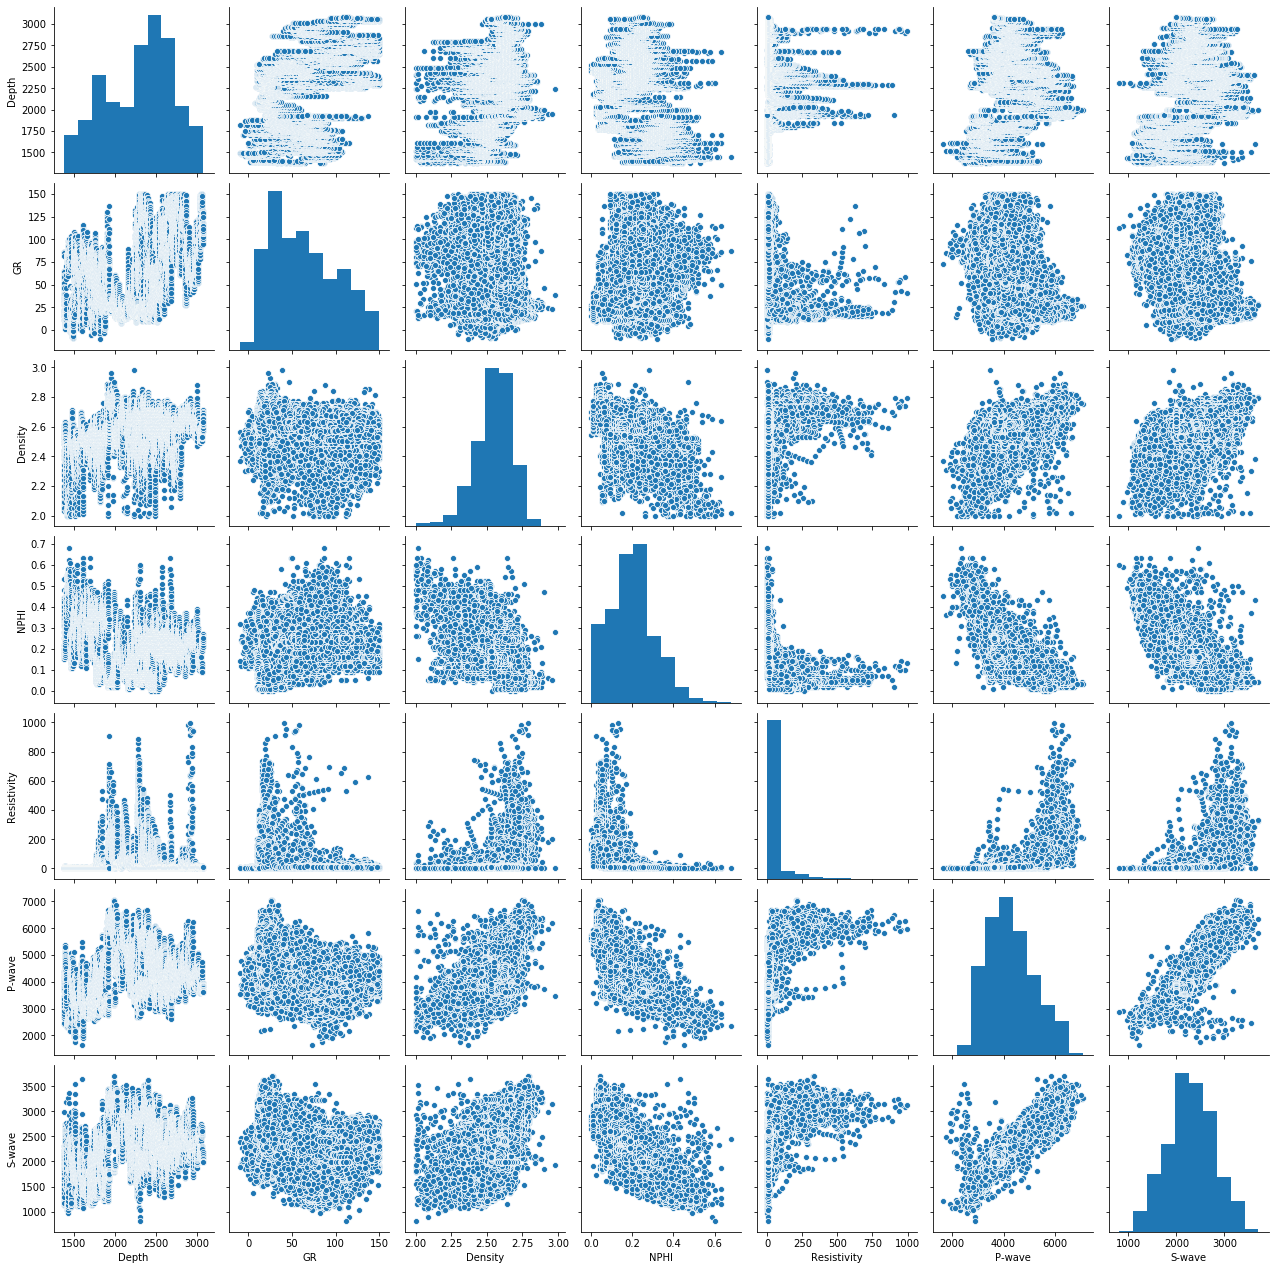

In [39]:
#inforamasi grafik / visual data korelasi
sns.pairplot(dfg2)

In [40]:
# informasi korelasi pada S-wave
dfg2.corr()['S-wave'].sort_values()

NPHI          -0.806420
GR            -0.369607
Depth          0.298162
Density        0.518887
Resistivity    0.519166
P-wave         0.929071
S-wave         1.000000
Name: S-wave, dtype: float64

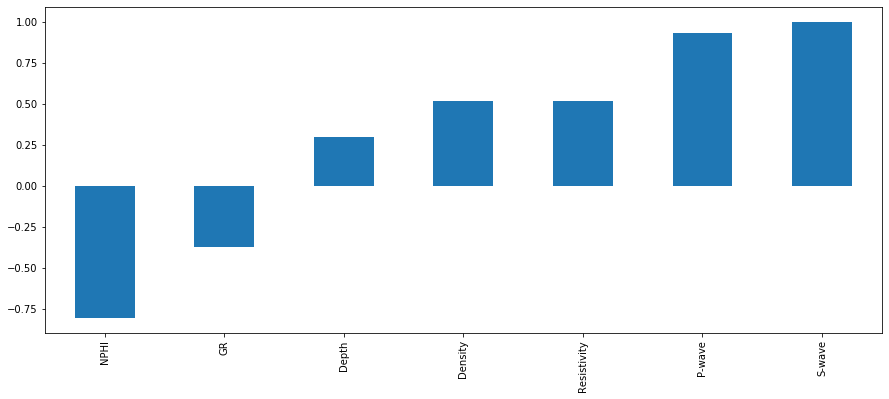

In [41]:
plt.figure(figsize=(15,6))
dfg2.corr()['S-wave'].sort_values().plot(kind='bar')

In [42]:
dfg2.describe() #data analysis

Depth            GR       Density          NPHI   Resistivity  \
count  19754.000000  19754.000000  19754.000000  19754.000000  19754.000000   
mean    2295.508824     64.924108      2.548941      0.200141     36.364535   
std      411.946276     37.911868      0.129152      0.106193     84.676766   
min     1379.520000     -9.950000      2.000000      0.000000      0.100000   
25%     1937.437500     30.252500      2.480000      0.120000      3.530000   
50%     2371.195000     61.190000      2.560000      0.200000      7.210000   
75%     2603.787500     94.440000      2.640000      0.260000     22.240000   
max     3077.850000    150.000000      2.980000      0.680000    994.800000   

             P-wave        S-wave  
count  19754.000000  19754.000000  
mean    4282.099041   2292.376616  
std      919.078573    483.500624  
min     1651.584936    807.410000  
25%     3598.689463   1977.345000  
50%     4161.660295   2287.086366  
75%     4883.050304   2630.930000  
max     7073.900000   3707.560000

df2 analysis ======================================================================================================

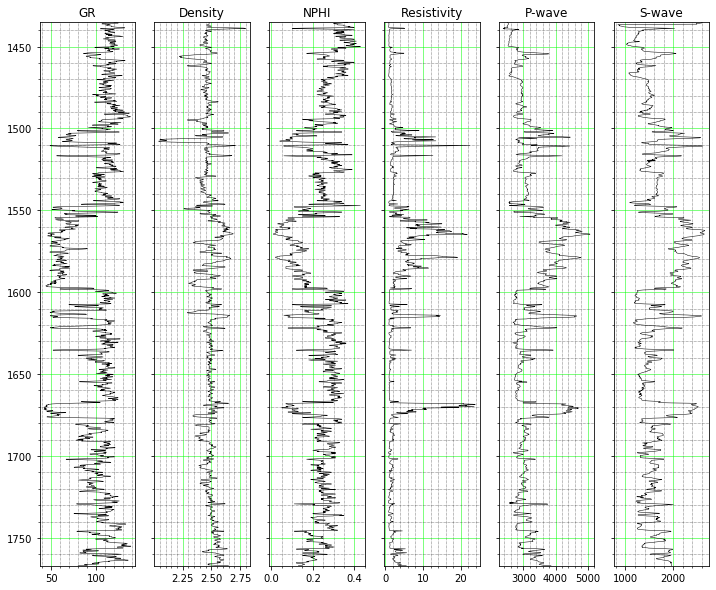

In [43]:
# visualisasi untuk QC data
data = df2.values
kolom = ['GR', 'Density','NPHI','Resistivity','P-wave','S-wave']
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    ax[i].plot(data[:, i+1], data[:,0], linewidth = '0.5',color='black')
    ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
    ax[i].set_title('%s' % kolom[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [44]:
#cek kelengkapan
df2.isnull().sum() #treat false=0, true=1

Depth          0
GR             0
Density        0
NPHI           0
Resistivity    0
P-wave         0
S-wave         0
dtype: int64

In [45]:
#informasi kuantitatif data korelasi
df2.corr()

Depth        GR   Density      NPHI  Resistivity    P-wave  \
Depth        1.000000 -0.045299  0.237147 -0.116152    -0.064066  0.052367   
GR          -0.045299  1.000000 -0.020659  0.817852    -0.669100 -0.821360   
Density      0.237147 -0.020659  1.000000 -0.252303     0.336372  0.354126   
NPHI        -0.116152  0.817852 -0.252303  1.000000    -0.761718 -0.895284   
Resistivity -0.064066 -0.669100  0.336372 -0.761718     1.000000  0.805426   
P-wave       0.052367 -0.821360  0.354126 -0.895284     0.805426  1.000000   
S-wave       0.019055 -0.825814  0.241715 -0.894109     0.767705  0.920816   

               S-wave  
Depth        0.019055  
GR          -0.825814  
Density      0.241715  
NPHI        -0.894109  
Resistivity  0.767705  
P-wave       0.920816  
S-wave       1.000000

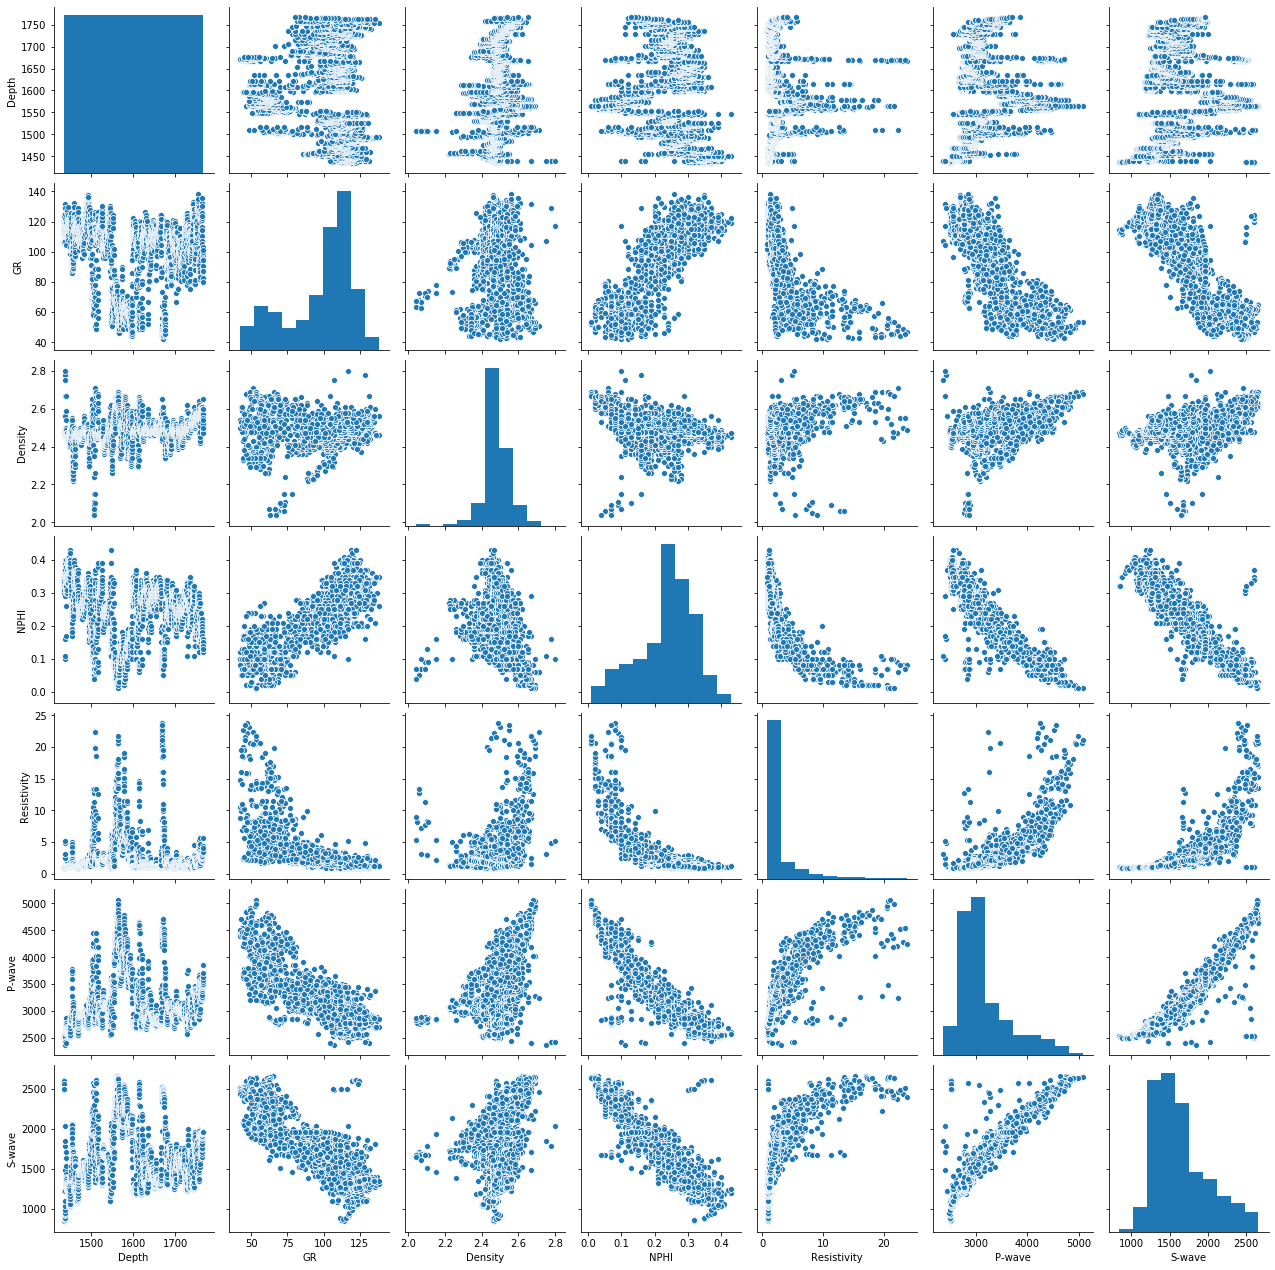

In [46]:
#inforamasi grafik / visual data korelasi
sns.pairplot(df2)

In [47]:
# informasi korelasi pada S-wave
df2.corr()['S-wave'].sort_values()

NPHI          -0.894109
GR            -0.825814
Depth          0.019055
Density        0.241715
Resistivity    0.767705
P-wave         0.920816
S-wave         1.000000
Name: S-wave, dtype: float64

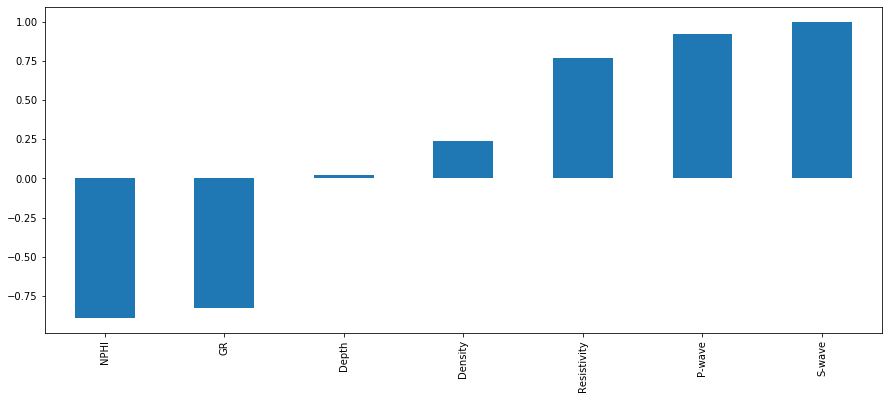

In [48]:
plt.figure(figsize=(15,6))
df2.corr()['S-wave'].sort_values().plot(kind='bar')

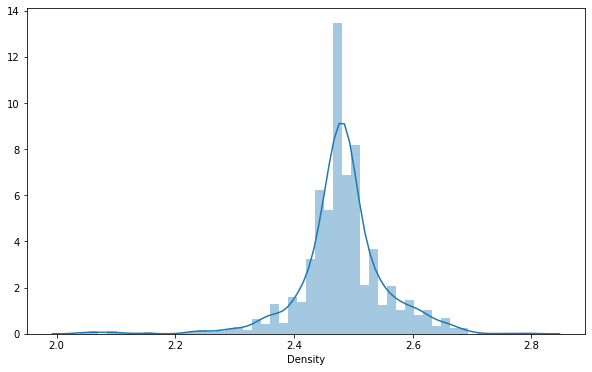

In [49]:
# untuk melihat distribution sebelum di edit
plt.figure(figsize=(10,6))
sns.distplot(df2['Density']) #distribution plot

In [50]:
#Feature Engineering
df2 = (df2[df2['Density'].astype(float) >= 2.2 ])
df2 = (df2[df2['Density'].astype(float)  <= 2.7 ])
df2.sort_values(by=['Depth'],ascending=True, inplace=True,)
df2.reset_index(drop=True, inplace=True)
df2

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0     1435.10  119.69     2.48  0.35         1.03  2494.884178  2595.651441
1     1435.25  121.52     2.48  0.37         1.03  2500.615309  2607.297046
2     1435.40  122.15     2.48  0.35         1.02  2515.266546  2605.752961
3     1435.55  124.48     2.48  0.34         1.00  2524.223602  2597.402597
4     1435.70  123.42     2.48  0.33         0.99  2525.478499  2557.714665
...       ...     ...      ...   ...          ...          ...          ...
2191  1766.45   86.88     2.47  0.15         4.32  3543.362009  1963.909966
2192  1766.60   90.31     2.50  0.15         3.77  3579.985906  1963.534362
2193  1766.75   87.03     2.54  0.15         3.45  3635.496183  1963.409192
2194  1766.90   82.89     2.60  0.14         4.13  3708.480350  1963.659547
2195  1767.05   80.01     2.65  0.13         5.60  3858.716293  1963.659547

[2196 rows x 7 columns]

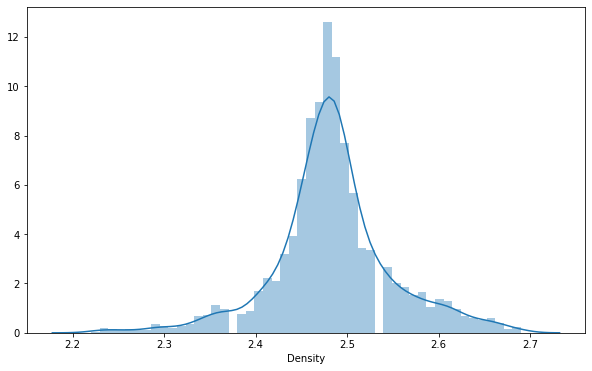

In [51]:
# untuk melihat distribution sebelum di edit
plt.figure(figsize=(10,6))
sns.distplot(df2['Density']) #distribution plot

In [52]:
# informasi korelasi pada S-wave
df2.corr()['S-wave'].sort_values()

NPHI          -0.903263
GR            -0.830952
Depth          0.022157
Density        0.267607
Resistivity    0.775287
P-wave         0.926913
S-wave         1.000000
Name: S-wave, dtype: float64

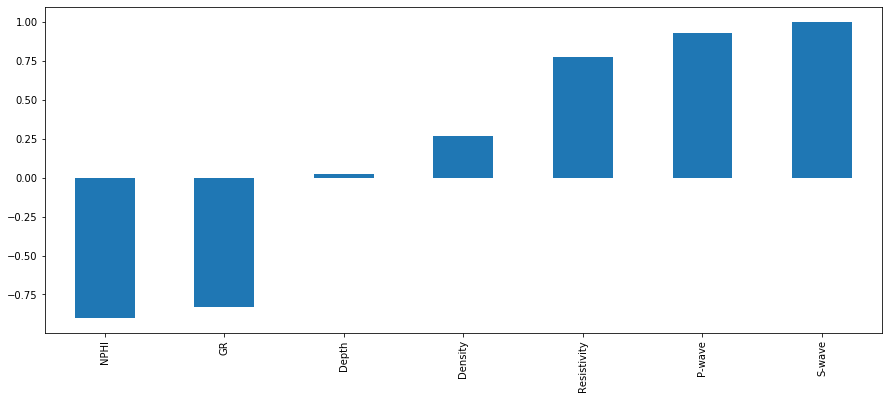

In [53]:
plt.figure(figsize=(15,6))
df2.corr()['S-wave'].sort_values().plot(kind='bar')

In [54]:
df2.describe() #data analysis

Depth           GR      Density         NPHI  Resistivity  \
count  2196.000000  2196.000000  2196.000000  2196.000000  2196.000000   
mean   1601.935587    98.524945     2.483875     0.238110     2.793474   
std      95.780513    22.676756     0.065662     0.082289     3.229814   
min    1435.100000    42.110000     2.220000     0.010000     0.840000   
25%    1520.112500    86.710000     2.450000     0.190000     1.180000   
50%    1602.425000   106.320000     2.480000     0.250000     1.660000   
75%    1684.737500   114.605000     2.510000     0.300000     2.550000   
max    1767.050000   138.400000     2.690000     0.430000    23.790000   

            P-wave       S-wave  
count  2196.000000  2196.000000  
mean   3169.601944  1644.592139  
std     500.154913   356.703496  
min    2395.096653   840.840841  
25%    2826.737191  1367.506249  
50%    3021.112132  1559.414717  
75%    3352.950913  1842.380783  
max    5072.391413  2660.677263

# Part 3 : Data Pre-Processing

- Metode 1 : Menggunakan split Test-Train secara random dengan ratio 20:80
            => sekitar 34.000 data (20%) dari keseluruhan data dijadikan data test

In [55]:
dfg1

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0      1379.52   86.44     2.04  0.53         1.09  2445.835339  2311.016756
1      1379.68   86.04     2.17  0.48         1.25  2483.095723  2983.263189
2      1379.83   84.61     2.30  0.44         1.41  2757.622365  1186.176837
3      1379.98   81.59     2.43  0.39         1.57  2886.090332  1317.712161
4      1380.13   65.02     2.40  0.40         1.58  3477.863989  1349.448798
...        ...     ...      ...   ...          ...          ...          ...
21963  3077.25  108.66     2.63  0.24         7.24  3637.130000  1992.160000
21964  3077.40  109.86     2.65  0.25         7.25  3634.300000  1992.160000
21965  3077.55  108.99     2.65  0.25         8.02  3634.300000  1992.160000
21966  3077.70  114.11     2.65  0.24         7.80  3634.300000  1992.160000
21967  3077.85  111.58     2.63  0.25         7.19  3634.300000  1992.160000

[21968 rows x 7 columns]

In [56]:
#Assign Label and Features
X1 = dfg1[['Depth','GR','Density','NPHI','Resistivity','P-wave']] #Features
y1 = dfg1['S-wave'] #'LABEL'
print ('Feature adalah dibawah ini:','\n',X1)
print ('Label adalah dibawah ini:','\n',y1)

Feature adalah dibawah ini: 
          Depth      GR  Density  NPHI  Resistivity       P-wave
0      1379.52   86.44     2.04  0.53         1.09  2445.835339
1      1379.68   86.04     2.17  0.48         1.25  2483.095723
2      1379.83   84.61     2.30  0.44         1.41  2757.622365
3      1379.98   81.59     2.43  0.39         1.57  2886.090332
4      1380.13   65.02     2.40  0.40         1.58  3477.863989
...        ...     ...      ...   ...          ...          ...
21963  3077.25  108.66     2.63  0.24         7.24  3637.130000
21964  3077.40  109.86     2.65  0.25         7.25  3634.300000
21965  3077.55  108.99     2.65  0.25         8.02  3634.300000
21966  3077.70  114.11     2.65  0.24         7.80  3634.300000
21967  3077.85  111.58     2.63  0.25         7.19  3634.300000

[21968 rows x 6 columns]
Label adalah dibawah ini: 
 0        2311.016756
1        2983.263189
2        1186.176837
3        1317.712161
4        1349.448798
            ...     
21963    1992.160000
2

In [57]:
#casting ke dalam ndarray
X1 = X1.values
y1 = y1.values

#Train and Test Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

#untuk lebih tahu jumlah detail pembagian data train dan test
print (X_train1.shape)
print (X_test1.shape)

(17574, 6)
(4394, 6)


In [71]:
print ('Jumlah row untuk data train metode 1:\t',X_train1.shape)
print ('Jumlah row untuk data test metode 1:\t',X_test1.shape)

Jumlah row untuk data train metode 1:	 (17574, 6)
Jumlah row untuk data test metode 1:	 (4394, 6)


In [58]:
print(type(X_train1))

<class 'numpy.ndarray'>


In [72]:
#preprocessing - scaling
scaler1 = MinMaxScaler()
X_train1 = scaler1.fit_transform(X_train1)
X_test1 = scaler1.transform(X_test1) #JANGAN DI FIT

- Metode 2 : Menggunakan seluruh well ABG-03 sebagai "test well"
            => sekitar 15.000 data (8~10%) dari keseluruhan data dijadikan data test

In [59]:
#Data Training
dfg2 #data training (X_train2,y_train2)

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0      1379.52   86.44     2.04  0.53         1.09  2445.835339  2311.016756
1      1379.68   86.04     2.17  0.48         1.25  2483.095723  2983.263189
2      1379.83   84.61     2.30  0.44         1.41  2757.622365  1186.176837
3      1379.98   81.59     2.43  0.39         1.57  2886.090332  1317.712161
4      1380.13   65.02     2.40  0.40         1.58  3477.863989  1349.448798
...        ...     ...      ...   ...          ...          ...          ...
19749  3077.25  108.66     2.63  0.24         7.24  3637.130000  1992.160000
19750  3077.40  109.86     2.65  0.25         7.25  3634.300000  1992.160000
19751  3077.55  108.99     2.65  0.25         8.02  3634.300000  1992.160000
19752  3077.70  114.11     2.65  0.24         7.80  3634.300000  1992.160000
19753  3077.85  111.58     2.63  0.25         7.19  3634.300000  1992.160000

[19754 rows x 7 columns]

In [60]:
#Data Training
#Assign Label and Features data training
X2 = dfg2[['Depth','GR','Density','NPHI','Resistivity','P-wave']] #Features
y2 = dfg2['S-wave'] #'LABEL'
print ('Feature adalah dibawah ini:','\n',X2)
print ('Label adalah dibawah ini:','\n',y2)

Feature adalah dibawah ini: 
          Depth      GR  Density  NPHI  Resistivity       P-wave
0      1379.52   86.44     2.04  0.53         1.09  2445.835339
1      1379.68   86.04     2.17  0.48         1.25  2483.095723
2      1379.83   84.61     2.30  0.44         1.41  2757.622365
3      1379.98   81.59     2.43  0.39         1.57  2886.090332
4      1380.13   65.02     2.40  0.40         1.58  3477.863989
...        ...     ...      ...   ...          ...          ...
19749  3077.25  108.66     2.63  0.24         7.24  3637.130000
19750  3077.40  109.86     2.65  0.25         7.25  3634.300000
19751  3077.55  108.99     2.65  0.25         8.02  3634.300000
19752  3077.70  114.11     2.65  0.24         7.80  3634.300000
19753  3077.85  111.58     2.63  0.25         7.19  3634.300000

[19754 rows x 6 columns]
Label adalah dibawah ini: 
 0        2311.016756
1        2983.263189
2        1186.176837
3        1317.712161
4        1349.448798
            ...     
19749    1992.160000
1

In [61]:
#Data Training
#casting ke dalam ndarray
X2 = X2.values
y2 = y2.values

In [62]:
#Data Training
X_train2 = X2 #dirubah nama variabelnya menjadi X_train2
y_train2 = y2 #dirubah nama variabelnya menjadi y_train2
print (X_train2.shape)
print (y_train2.shape)

(19754, 6)
(19754,)


In [63]:
#Data Test - > ABG-03 sbg test well
df2 #data test (X_test2,y_test2)

Depth      GR  Density  NPHI  Resistivity       P-wave       S-wave
0     1435.10  119.69     2.48  0.35         1.03  2494.884178  2595.651441
1     1435.25  121.52     2.48  0.37         1.03  2500.615309  2607.297046
2     1435.40  122.15     2.48  0.35         1.02  2515.266546  2605.752961
3     1435.55  124.48     2.48  0.34         1.00  2524.223602  2597.402597
4     1435.70  123.42     2.48  0.33         0.99  2525.478499  2557.714665
...       ...     ...      ...   ...          ...          ...          ...
2191  1766.45   86.88     2.47  0.15         4.32  3543.362009  1963.909966
2192  1766.60   90.31     2.50  0.15         3.77  3579.985906  1963.534362
2193  1766.75   87.03     2.54  0.15         3.45  3635.496183  1963.409192
2194  1766.90   82.89     2.60  0.14         4.13  3708.480350  1963.659547
2195  1767.05   80.01     2.65  0.13         5.60  3858.716293  1963.659547

[2196 rows x 7 columns]

In [64]:
#Data Test
#Assign Label and Features data training
X3 = df2[['Depth','GR','Density','NPHI','Resistivity','P-wave']] #Features
y3 = df2['S-wave'] #'LABEL'
print ('Feature adalah dibawah ini:','\n',X3)
print ('Label adalah dibawah ini:','\n',y3)

Feature adalah dibawah ini: 
         Depth      GR  Density  NPHI  Resistivity       P-wave
0     1435.10  119.69     2.48  0.35         1.03  2494.884178
1     1435.25  121.52     2.48  0.37         1.03  2500.615309
2     1435.40  122.15     2.48  0.35         1.02  2515.266546
3     1435.55  124.48     2.48  0.34         1.00  2524.223602
4     1435.70  123.42     2.48  0.33         0.99  2525.478499
...       ...     ...      ...   ...          ...          ...
2191  1766.45   86.88     2.47  0.15         4.32  3543.362009
2192  1766.60   90.31     2.50  0.15         3.77  3579.985906
2193  1766.75   87.03     2.54  0.15         3.45  3635.496183
2194  1766.90   82.89     2.60  0.14         4.13  3708.480350
2195  1767.05   80.01     2.65  0.13         5.60  3858.716293

[2196 rows x 6 columns]
Label adalah dibawah ini: 
 0       2595.651441
1       2607.297046
2       2605.752961
3       2597.402597
4       2557.714665
           ...     
2191    1963.909966
2192    1963.534362
2

In [65]:
#Data Test
#casting ke dalam ndarray
X3 = X3.values
y3 = y3.values

In [66]:
#Data Training
X_test2 = X3 #dirubah nama variabelnya menjadi X_test2
y_test2 = y3 #dirubah nama variabelnya menjadi y_test2
print (X_test2.shape)
print (y_test2.shape)

(2196, 6)
(2196,)


In [70]:
#summary data training dan data test
print ('Jumlah row untuk data train metode 2:\t',X_train2.shape)
print ('Jumlah row untuk data test metode 2:\t',X_test2.shape)

Jumlah row untuk data train metode 2:	 (19754, 6)
Jumlah row untuk data test metode 2:	 (2196, 6)


In [73]:
#preprocessing - scaling
scaler2 = MinMaxScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2) #JANGAN DI FIT

# Part 4 : Creating Model

METODE 1 ==========================================================================================================
- Menggunakan data split random dari 4 well
- 17574 data training
- 4394 data test

In [74]:
#model attempt 1
model1 = Sequential()
model1.add(Dense(30,activation='relu'))
model1.add(Dense(30,activation='relu'))
model1.add(Dense(30,activation='relu'))
model1.add(Dense(30,activation='relu'))
model1.add(Dense(30,activation='relu'))
model1.add(Dense(30,activation='relu'))
model1.add(Dense(1)) #->final layer untuk output 
model1.compile(optimizer='adam',loss='mse')

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model1.fit(x=X_train1,y=y_train1,batch_size=64,epochs=600,validation_data=(X_test1,y_test1),callbacks=[early_stop])

Train on 17574 samples, validate on 4394 samples
Epoch 1/600
17574/17574 [==============================] - 2s 105us/sample - loss: 1918501.2498 - val_loss: 78892.7588
Epoch 2/600
17574/17574 [==============================] - 1s 40us/sample - loss: 49186.7302 - val_loss: 37078.5945
Epoch 3/600
17574/17574 [==============================] - 1s 46us/sample - loss: 32902.7946 - val_loss: 28786.2387
Epoch 4/600
17574/17574 [==============================] - 1s 40us/sample - loss: 27527.9519 - val_loss: 25584.5701
Epoch 5/600
17574/17574 [==============================] - 1s 44us/sample - loss: 26005.9263 - val_loss: 24437.9854
Epoch 6/600
17574/17574 [==============================] - 1s 43us/sample - loss: 25317.1716 - val_loss: 23967.4069
Epoch 7/600
17574/17574 [==============================] - 1s 38us/sample - loss: 25065.5778 - val_loss: 23575.1966
Epoch 8/600
17574/17574 [==============================] - 1s 39us/sample - loss: 24845.2041 - val_loss: 23213.7888
Epoch 9/600
17574/17

Epoch 140/600
17574/17574 [==============================] - 1s 43us/sample - loss: 20795.8097 - val_loss: 20847.8541
Epoch 141/600
17574/17574 [==============================] - 1s 45us/sample - loss: 20638.8221 - val_loss: 19932.0028
Epoch 142/600
17574/17574 [==============================] - 1s 51us/sample - loss: 20491.4691 - val_loss: 18710.3912
Epoch 143/600
17574/17574 [==============================] - 1s 46us/sample - loss: 20505.7983 - val_loss: 18629.1944
Epoch 144/600
17574/17574 [==============================] - 1s 47us/sample - loss: 20846.2305 - val_loss: 18928.8521
Epoch 145/600
17574/17574 [==============================] - 1s 49us/sample - loss: 20638.4859 - val_loss: 20234.8290
Epoch 146/600
17574/17574 [==============================] - 1s 45us/sample - loss: 20741.6567 - val_loss: 18768.6329
Epoch 147/600
17574/17574 [==============================] - 1s 51us/sample - loss: 20760.1404 - val_loss: 18440.6237
Epoch 148/600
17574/17574 [=============================

17574/17574 [==============================] - 1s 40us/sample - loss: 18614.6068 - val_loss: 17497.8348
Epoch 279/600
17574/17574 [==============================] - 1s 39us/sample - loss: 18628.4578 - val_loss: 17164.9073
Epoch 280/600
17574/17574 [==============================] - 1s 43us/sample - loss: 18763.1793 - val_loss: 17238.1615
Epoch 281/600
17574/17574 [==============================] - 1s 39us/sample - loss: 19017.2117 - val_loss: 17141.9148
Epoch 282/600
17574/17574 [==============================] - 1s 39us/sample - loss: 18572.1547 - val_loss: 17584.2609
Epoch 283/600
17574/17574 [==============================] - 1s 39us/sample - loss: 18591.8302 - val_loss: 17468.7040
Epoch 284/600
17574/17574 [==============================] - 1s 39us/sample - loss: 18718.6558 - val_loss: 17497.3170
Epoch 285/600
17574/17574 [==============================] - 1s 39us/sample - loss: 18820.8499 - val_loss: 17461.5809
Epoch 286/600
17574/17574 [==============================] - 1s 39us/s

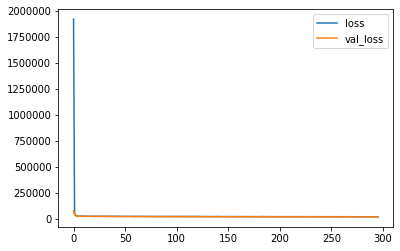

In [75]:
# plot grafik loss (visualisasi)
losses1=pd.DataFrame(model1.history.history)
losses1.plot()

In [77]:
# Testing Data / Prediction
test_predictions1 = model1.predict(X_test1)
test_predictions1 = pd.Series(test_predictions1.reshape(4394,)) #ngubah dr numpy->data series, jumlah = data test
pred_df1 = pd.DataFrame(y_test1,columns=['Test True Y'])
pred_df1 = pd.concat([pred_df1,test_predictions1],axis=1)#->sxis=1->along the columns
pred_df1.columns=['S-wave ORIG','S-wave PRED']
pred_df1

S-wave ORIG  S-wave PRED
0     2804.821938  2718.395508
1     2801.213124  2961.764404
2     2074.598421  2156.270020
3     2255.020000  2166.324219
4     1474.244256  1491.145142
...           ...          ...
4389  2042.830000  2109.841309
4390  2073.560000  2051.579834
4391  2809.993547  2712.689453
4392  1625.480000  1671.602905
4393  2453.711158  2459.669189

[4394 rows x 2 columns]

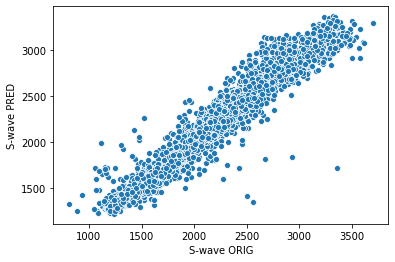

In [78]:
sns.scatterplot(x='S-wave ORIG',y='S-wave PRED',data=pred_df1)

In [114]:
# Untuk Cutt-off data bagus atau tidak
dfg1.describe() 

Depth            GR       Density          NPHI   Resistivity  \
count  21968.000000  21968.000000  21968.000000  21968.000000  21968.000000   
mean    2225.521729     68.292602      2.542179      0.203847     32.985257   
std      444.103187     38.023328      0.126310      0.104681     80.934956   
min     1379.520000     -9.950000      2.000000      0.000000      0.100000   
25%     1808.245000     33.247500      2.470000      0.130000      2.780000   
50%     2305.250000     65.325000      2.540000      0.210000      6.490000   
75%     2578.362500    102.202500      2.630000      0.270000     18.412500   
max     3077.850000    150.000000      2.980000      0.680000    994.800000   

             P-wave        S-wave  
count  21968.000000  21968.000000  
mean    4169.662439   2227.175968  
std      947.374948    510.787305  
min     1651.584936    807.410000  
25%     3430.886988   1865.702713  
50%     4052.005000   2234.582053  
75%     4786.432161   2589.469663  
max     7073.900000   3707.560000

In [111]:
#SUMMARY Report
print('FINAL REPORT "MODEL-1"','\n')

#mencari MSE
#MSE hasilnya akan sama saat model.evaluate(X_test,y_test,verbose=1)
mse = mean_squared_error(pred_df1['S-wave ORIG'],pred_df1['S-wave PRED'])
print ('Mean Squeared Error: ',mse)
#mencari RMSE 
rmse = np.sqrt(mean_squared_error(pred_df1['S-wave ORIG'],pred_df1['S-wave PRED']))
print ('Root Mean Squeared Error: ',rmse)
#mencari MAE
mae = mean_absolute_error(pred_df1['S-wave ORIG'],pred_df1['S-wave PRED'])
print ('Mean Absolute Error: ',mae)
print ('\n')
#mencari nilai keakuratan
evs = explained_variance_score(pred_df1['S-wave ORIG'],pred_df1['S-wave PRED'])
print ('Explained Variance Score: ',evs)

FINAL REPORT "MODEL-1" 

Mean Squeared Error:  17337.760643611735
Root Mean Squeared Error:  131.6729305651383
Mean Absolute Error:  90.16292216869884


Explained Variance Score:  0.9348508806243109


In [101]:
#model attempt 2
model2 = Sequential()
model2.add(Dense(50,activation='relu'))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(1)) #->final layer untuk output 
model2.compile(optimizer='adam',loss='mse')

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model2.fit(x=X_train1,y=y_train1,batch_size=64,epochs=600,validation_data=(X_test1,y_test1),callbacks=[early_stop])

Train on 17574 samples, validate on 4394 samples
Epoch 1/600
17574/17574 [==============================] - 2s 106us/sample - loss: 1222250.6544 - val_loss: 50507.8695
Epoch 2/600
17574/17574 [==============================] - 1s 47us/sample - loss: 36528.3481 - val_loss: 25814.2328
Epoch 3/600
17574/17574 [==============================] - 1s 47us/sample - loss: 25941.7932 - val_loss: 24179.0827
Epoch 4/600
17574/17574 [==============================] - 1s 42us/sample - loss: 25231.1763 - val_loss: 23925.1386
Epoch 5/600
17574/17574 [==============================] - 1s 46us/sample - loss: 25059.6121 - val_loss: 23946.6175
Epoch 6/600
17574/17574 [==============================] - 1s 44us/sample - loss: 24794.3742 - val_loss: 23287.3621
Epoch 7/600
17574/17574 [==============================] - 1s 43us/sample - loss: 24789.1669 - val_loss: 24408.4699
Epoch 8/600
17574/17574 [==============================] - 1s 47us/sample - loss: 24632.5726 - val_loss: 23003.0892
Epoch 9/600
17574/17

Epoch 140/600
17574/17574 [==============================] - 1s 46us/sample - loss: 19076.1655 - val_loss: 17268.3874
Epoch 141/600
17574/17574 [==============================] - 1s 47us/sample - loss: 19018.2352 - val_loss: 17028.2148
Epoch 142/600
17574/17574 [==============================] - 1s 47us/sample - loss: 18714.8968 - val_loss: 19352.4325
Epoch 143/600
17574/17574 [==============================] - 1s 44us/sample - loss: 19008.2879 - val_loss: 17839.2980
Epoch 144/600
17574/17574 [==============================] - 1s 48us/sample - loss: 18704.1410 - val_loss: 17666.2796
Epoch 145/600
17574/17574 [==============================] - 1s 44us/sample - loss: 19048.7450 - val_loss: 17348.6804
Epoch 146/600
17574/17574 [==============================] - 1s 46us/sample - loss: 19280.0594 - val_loss: 20305.2419
Epoch 147/600
17574/17574 [==============================] - 1s 46us/sample - loss: 18644.3731 - val_loss: 16950.5943
Epoch 148/600
17574/17574 [=============================

17574/17574 [==============================] - 1s 46us/sample - loss: 16894.9741 - val_loss: 16145.6327
Epoch 279/600
17574/17574 [==============================] - 1s 44us/sample - loss: 16884.9366 - val_loss: 15707.9838
Epoch 280/600
17574/17574 [==============================] - 1s 43us/sample - loss: 16974.9100 - val_loss: 17465.5809
Epoch 281/600
17574/17574 [==============================] - 1s 44us/sample - loss: 16965.7836 - val_loss: 15542.0338
Epoch 282/600
17574/17574 [==============================] - 1s 47us/sample - loss: 17058.2628 - val_loss: 16195.3439
Epoch 283/600
17574/17574 [==============================] - 1s 43us/sample - loss: 16992.8133 - val_loss: 16158.5212
Epoch 284/600
17574/17574 [==============================] - 1s 43us/sample - loss: 17114.8186 - val_loss: 15863.5380
Epoch 285/600
17574/17574 [==============================] - 1s 43us/sample - loss: 16424.2282 - val_loss: 15785.0155
Epoch 286/600
17574/17574 [==============================] - 1s 44us/s

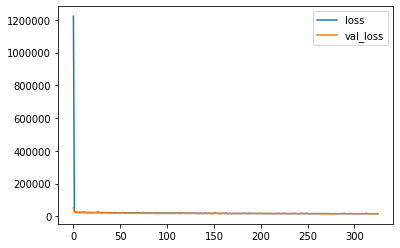

In [110]:
# plot grafik loss (visualisasi)
losses2=pd.DataFrame(model2.history.history)
losses2.plot()

In [103]:
# Testing Data / Prediction
test_predictions2 = model2.predict(X_test1)
test_predictions2 = pd.Series(test_predictions2.reshape(4394,)) #ngubah dr numpy->data series, jumlah = data test
pred_df2 = pd.DataFrame(y_test1,columns=['Test True Y'])
pred_df2 = pd.concat([pred_df2,test_predictions2],axis=1)#->sxis=1->along the columns
pred_df2.columns=['S-wave ORIG','S-wave PRED']
pred_df2

S-wave ORIG  S-wave PRED
0     2804.821938  2727.005615
1     2801.213124  2970.732178
2     2074.598421  2129.892578
3     2255.020000  2182.776367
4     1474.244256  1486.488647
...           ...          ...
4389  2042.830000  2034.937378
4390  2073.560000  2056.662842
4391  2809.993547  2765.254395
4392  1625.480000  1619.212036
4393  2453.711158  2331.395996

[4394 rows x 2 columns]

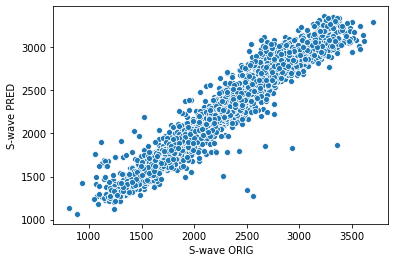

In [104]:
sns.scatterplot(x='S-wave ORIG',y='S-wave PRED',data=pred_df2)

In [112]:
dfg1.describe()

Depth            GR       Density          NPHI   Resistivity  \
count  21968.000000  21968.000000  21968.000000  21968.000000  21968.000000   
mean    2225.521729     68.292602      2.542179      0.203847     32.985257   
std      444.103187     38.023328      0.126310      0.104681     80.934956   
min     1379.520000     -9.950000      2.000000      0.000000      0.100000   
25%     1808.245000     33.247500      2.470000      0.130000      2.780000   
50%     2305.250000     65.325000      2.540000      0.210000      6.490000   
75%     2578.362500    102.202500      2.630000      0.270000     18.412500   
max     3077.850000    150.000000      2.980000      0.680000    994.800000   

             P-wave        S-wave  
count  21968.000000  21968.000000  
mean    4169.662439   2227.175968  
std      947.374948    510.787305  
min     1651.584936    807.410000  
25%     3430.886988   1865.702713  
50%     4052.005000   2234.582053  
75%     4786.432161   2589.469663  
max     7073.900000   3707.560000

In [106]:
#SUMMARY Report
print('FINAL REPORT "MODEL-2"','\n')

#mencari MSE
#MSE hasilnya akan sama saat model.evaluate(X_test,y_test,verbose=1)
mse = mean_squared_error(pred_df2['S-wave ORIG'],pred_df2['S-wave PRED'])
print ('Mean Squeared Error: ',mse)
#mencari RMSE 
rmse = np.sqrt(mean_squared_error(pred_df2['S-wave ORIG'],pred_df2['S-wave PRED']))
print ('Root Mean Squeared Error: ',rmse)
#mencari MAE
mae = mean_absolute_error(pred_df2['S-wave ORIG'],pred_df2['S-wave PRED'])
print ('Mean Absolute Error: ',mae)
print ('\n')
#mencari nilai keakuratan
evs = explained_variance_score(pred_df2['S-wave ORIG'],pred_df2['S-wave PRED'])
print ('Explained Variance Score: ',evs)

FINAL REPORT "MODEL-2" 

Mean Squeared Error:  15469.177938309134
Root Mean Squeared Error:  124.37515000316235
Mean Absolute Error:  83.19724437436355


Explained Variance Score:  0.94213253565334


METODE 2 ==========================================================================================================
- Menggunakan data test dan training yag sudah ditentukan, bukan random split
- 19754 data training (gabungan 3 well)
- 2196 data test (well ABG-03)

In [115]:
#model attempt 3
model_a = Sequential()
model_a.add(Dense(30,activation='relu'))
model_a.add(Dense(30,activation='relu'))
model_a.add(Dense(30,activation='relu'))
model_a.add(Dense(30,activation='relu'))
model_a.add(Dense(30,activation='relu'))
model_a.add(Dense(30,activation='relu'))
model_a.add(Dense(1)) #->final layer untuk output 
model_a.compile(optimizer='adam',loss='mse')

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model_a.fit(x=X_train2,y=y_train2,batch_size=64,epochs=600,validation_data=(X_test2,y_test2),callbacks=[early_stop])

Train on 19754 samples, validate on 2196 samples
Epoch 1/600
19754/19754 [==============================] - 1s 71us/sample - loss: 1991769.2671 - val_loss: 133447.0511
Epoch 2/600
19754/19754 [==============================] - 1s 39us/sample - loss: 57705.9358 - val_loss: 41301.8942
Epoch 3/600
19754/19754 [==============================] - 1s 39us/sample - loss: 38122.4530 - val_loss: 33613.0968
Epoch 4/600
19754/19754 [==============================] - 1s 35us/sample - loss: 30467.9176 - val_loss: 26548.2305
Epoch 5/600
19754/19754 [==============================] - 1s 39us/sample - loss: 27564.7824 - val_loss: 24110.9767
Epoch 6/600
19754/19754 [==============================] - 1s 43us/sample - loss: 26794.8496 - val_loss: 22989.2413
Epoch 7/600
19754/19754 [==============================] - 1s 46us/sample - loss: 26434.5571 - val_loss: 21731.5388
Epoch 8/600
19754/19754 [==============================] - 1s 32us/sample - loss: 26204.3359 - val_loss: 23527.0621
Epoch 9/600
19754/19

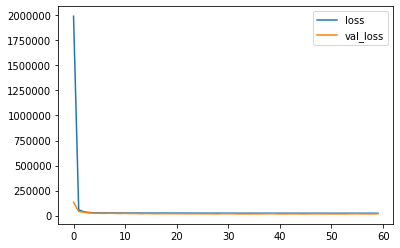

In [116]:
# plot grafik loss (visualisasi)
losses_a=pd.DataFrame(model_a.history.history)
losses_a.plot()

In [117]:
# Testing Data / Prediction
test_predictions_a = model_a.predict(X_test2)
test_predictions_a = pd.Series(test_predictions_a.reshape(2196,)) #ngubah dr numpy->data series, jumlah = data test
pred_df_a = pd.DataFrame(y_test2,columns=['Test True Y'])
pred_df_a = pd.concat([pred_df_a,test_predictions_a],axis=1)#->sxis=1->along the columns
pred_df_a.columns=['S-wave ORIG','S-wave PRED']
pred_df_a

S-wave ORIG  S-wave PRED
0     2595.651441  1345.475220
1     2607.297046  1356.579834
2     2605.752961  1351.676025
3     2597.402597  1353.793213
4     2557.714665  1351.105957
...           ...          ...
2191  1963.909966  1941.864868
2192  1963.534362  1949.310913
2193  1963.409192  1965.034424
2194  1963.659547  1995.284668
2195  1963.659547  2064.161865

[2196 rows x 2 columns]

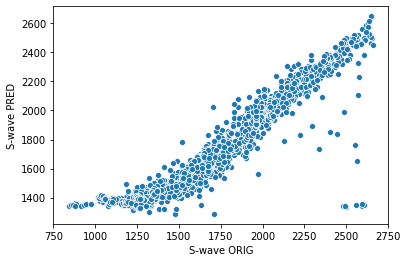

In [118]:
sns.scatterplot(x='S-wave ORIG',y='S-wave PRED',data=pred_df_a)

In [119]:
df2.describe()

Depth           GR      Density         NPHI  Resistivity  \
count  2196.000000  2196.000000  2196.000000  2196.000000  2196.000000   
mean   1601.935587    98.524945     2.483875     0.238110     2.793474   
std      95.780513    22.676756     0.065662     0.082289     3.229814   
min    1435.100000    42.110000     2.220000     0.010000     0.840000   
25%    1520.112500    86.710000     2.450000     0.190000     1.180000   
50%    1602.425000   106.320000     2.480000     0.250000     1.660000   
75%    1684.737500   114.605000     2.510000     0.300000     2.550000   
max    1767.050000   138.400000     2.690000     0.430000    23.790000   

            P-wave       S-wave  
count  2196.000000  2196.000000  
mean   3169.601944  1644.592139  
std     500.154913   356.703496  
min    2395.096653   840.840841  
25%    2826.737191  1367.506249  
50%    3021.112132  1559.414717  
75%    3352.950913  1842.380783  
max    5072.391413  2660.677263

In [120]:
#SUMMARY Report
print('FINAL REPORT "MODEL-a"','\n')

#mencari MSE
#MSE hasilnya akan sama saat model.evaluate(X_test,y_test,verbose=1)
mse = mean_squared_error(pred_df_a['S-wave ORIG'],pred_df_a['S-wave PRED'])
print ('Mean Squeared Error: ',mse)
#mencari RMSE 
rmse = np.sqrt(mean_squared_error(pred_df_a['S-wave ORIG'],pred_df_a['S-wave PRED']))
print ('Root Mean Squeared Error: ',rmse)
#mencari MAE
mae = mean_absolute_error(pred_df_a['S-wave ORIG'],pred_df_a['S-wave PRED'])
print ('Mean Absolute Error: ',mae)
print ('\n')
#mencari nilai keakuratan
evs = explained_variance_score(pred_df_a['S-wave ORIG'],pred_df_a['S-wave PRED'])
print ('Explained Variance Score: ',evs)

FINAL REPORT "MODEL-a" 

Mean Squeared Error:  17613.706234731606
Root Mean Squeared Error:  132.7166388767121
Mean Absolute Error:  83.67502385895742


Explained Variance Score:  0.862003864449898


In [201]:
#model attempt 4
model_b = Sequential()
model_b.add(Dense(30,activation='relu'))
model_b.add(Dense(30,activation='relu'))
model_b.add(Dense(30,activation='relu'))
model_b.add(Dense(30,activation='relu'))
model_b.add(Dense(30,activation='relu'))
model_b.add(Dense(30,activation='relu'))
model_b.add(Dense(30,activation='relu'))
model_b.add(Dense(30,activation='relu'))
model_b.add(Dense(1)) #->final layer untuk output 
model_b.compile(optimizer='adam',loss='mse')

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model_b.fit(x=X_train2,y=y_train2,batch_size=64,epochs=600,validation_data=(X_test2,y_test2),callbacks=[early_stop])

Train on 19754 samples, validate on 2196 samples
Epoch 1/600
19754/19754 [==============================] - 2s 88us/sample - loss: 1460372.3854 - val_loss: 86791.1633
Epoch 2/600
19754/19754 [==============================] - 1s 44us/sample - loss: 42946.0564 - val_loss: 36440.0693
Epoch 3/600
19754/19754 [==============================] - 1s 42us/sample - loss: 29471.5107 - val_loss: 26219.6568
Epoch 4/600
19754/19754 [==============================] - 1s 43us/sample - loss: 26418.6624 - val_loss: 25228.8782
Epoch 5/600
19754/19754 [==============================] - 1s 42us/sample - loss: 25530.2833 - val_loss: 21997.9755
Epoch 6/600
19754/19754 [==============================] - 1s 43us/sample - loss: 24963.5487 - val_loss: 22659.3399
Epoch 7/600
19754/19754 [==============================] - 1s 43us/sample - loss: 24433.4029 - val_loss: 22235.0304
Epoch 8/600
19754/19754 [==============================] - 1s 43us/sample - loss: 24372.5349 - val_loss: 18050.1452
Epoch 9/600
19754/197

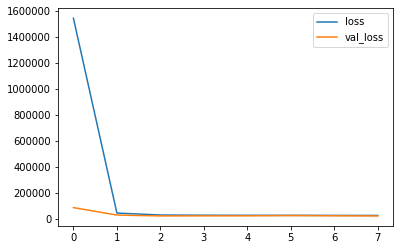

In [196]:
# plot grafik loss (visualisasi)
losses_b=pd.DataFrame(model_b.history.history)
losses_b.plot()

In [197]:
# Testing Data / Prediction
test_predictions_b = model_b.predict(X_test2)
test_predictions_b = pd.Series(test_predictions_b.reshape(2196,)) #ngubah dr numpy->data series, jumlah = data test
pred_df_b = pd.DataFrame(y_test2,columns=['Test True Y'])
pred_df_b = pd.concat([pred_df_b,test_predictions_b],axis=1)#->sxis=1->along the columns
pred_df_b.columns=['S-wave ORIG','S-wave PRED']
pred_df_b

S-wave ORIG  S-wave PRED
0     2595.651441  1319.580688
1     2607.297046  1318.085205
2     2605.752961  1329.605225
3     2597.402597  1339.042236
4     2557.714665  1343.856567
...           ...          ...
2191  1963.909966  1896.617188
2192  1963.534362  1906.510742
2193  1963.409192  1922.176270
2194  1963.659547  1949.721680
2195  1963.659547  2012.113525

[2196 rows x 2 columns]

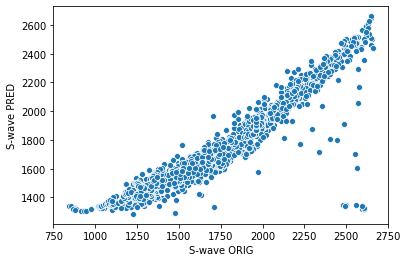

In [198]:
sns.scatterplot(x='S-wave ORIG',y='S-wave PRED',data=pred_df_b)

In [199]:
df2.describe()

Depth           GR      Density         NPHI  Resistivity  \
count  2196.000000  2196.000000  2196.000000  2196.000000  2196.000000   
mean   1601.935587    98.524945     2.483875     0.238110     2.793474   
std      95.780513    22.676756     0.065662     0.082289     3.229814   
min    1435.100000    42.110000     2.220000     0.010000     0.840000   
25%    1520.112500    86.710000     2.450000     0.190000     1.180000   
50%    1602.425000   106.320000     2.480000     0.250000     1.660000   
75%    1684.737500   114.605000     2.510000     0.300000     2.550000   
max    1767.050000   138.400000     2.690000     0.430000    23.790000   

            P-wave       S-wave  
count  2196.000000  2196.000000  
mean   3169.601944  1644.592139  
std     500.154913   356.703496  
min    2395.096653   840.840841  
25%    2826.737191  1367.506249  
50%    3021.112132  1559.414717  
75%    3352.950913  1842.380783  
max    5072.391413  2660.677263

In [200]:
#SUMMARY Report
print('FINAL REPORT "MODEL-b"','\n')

#mencari MSE
#MSE hasilnya akan sama saat model.evaluate(X_test,y_test,verbose=1)
mse = mean_squared_error(pred_df_b['S-wave ORIG'],pred_df_b['S-wave PRED'])
print ('Mean Squeared Error: ',mse)
#mencari RMSE 
rmse = np.sqrt(mean_squared_error(pred_df_b['S-wave ORIG'],pred_df_b['S-wave PRED']))
print ('Root Mean Squeared Error: ',rmse)
#mencari MAE
mae = mean_absolute_error(pred_df_b['S-wave ORIG'],pred_df_b['S-wave PRED'])
print ('Mean Absolute Error: ',mae)
print ('\n')
#mencari nilai keakuratan
evs = explained_variance_score(pred_df_b['S-wave ORIG'],pred_df_b['S-wave PRED'])
print ('Explained Variance Score: ',evs)

FINAL REPORT "MODEL-b" 

Mean Squeared Error:  22023.28059758973
Root Mean Squeared Error:  148.40242786959294
Mean Absolute Error:  103.45761822064115


Explained Variance Score:  0.8361033326451013


# Part 5 : Cross-testing

Pada tahap ini, untuk tiap-tiap metode dengan nilai performa model yang terbaik akan di dicoba dengan data test yg berbeda:
- Model 2 akan memakai X_test2 dan y_test2 
- Model a akan memakai X_test1 dan y_test1

Model 2 dengan data test dr metode 2 ==============================================================================

In [205]:
# Testing Data / Prediction
test_predictions_ct1 = model2.predict(X_test2)
test_predictions_ct1 = pd.Series(test_predictions_ct1.reshape(2196,)) #ngubah dr numpy->data series, jumlah = data test
pred_df_ct1 = pd.DataFrame(y_test2,columns=['Test True Y'])
pred_df_ct1 = pd.concat([pred_df_ct1,test_predictions_ct1],axis=1)#->sxis=1->along the columns
pred_df_ct1.columns=['S-wave ORIG','S-wave PRED']
pred_df_ct1

S-wave ORIG  S-wave PRED
0     2595.651441  1393.984619
1     2607.297046  1350.991089
2     2605.752961  1312.150146
3     2597.402597  1272.456055
4     2557.714665  1279.086060
...           ...          ...
2191  1963.909966  1961.101196
2192  1963.534362  1967.564209
2193  1963.409192  1944.593262
2194  1963.659547  1932.262817
2195  1963.659547  1978.510010

[2196 rows x 2 columns]

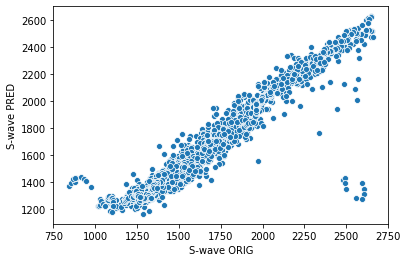

In [206]:
sns.scatterplot(x='S-wave ORIG',y='S-wave PRED',data=pred_df_ct1)

In [212]:
#SUMMARY Report
print('FINAL REPORT "MODEL - ct1"','\n')

#mencari MSE
#MSE hasilnya akan sama saat model.evaluate(X_test,y_test,verbose=1)
mse = mean_squared_error(pred_df_ct1['S-wave ORIG'],pred_df_ct1['S-wave PRED'])
print ('Mean Squeared Error: ',mse)
#mencari RMSE 
rmse = np.sqrt(mean_squared_error(pred_df_ct1['S-wave ORIG'],pred_df_ct1['S-wave PRED']))
print ('Root Mean Squeared Error: ',rmse)
#mencari MAE
mae = mean_absolute_error(pred_df_ct1['S-wave ORIG'],pred_df_ct1['S-wave PRED'])
print ('Mean Absolute Error: ',mae)
print ('\n')
#mencari nilai keakuratan
evs = explained_variance_score(pred_df_ct1['S-wave ORIG'],pred_df_ct1['S-wave PRED'])
print ('Explained Variance Score: ',evs)

FINAL REPORT "MODEL - ct1" 

Mean Squeared Error:  12275.153725488768
Root Mean Squeared Error:  110.79329278204871
Mean Absolute Error:  58.12740784993166


Explained Variance Score:  0.9037467983967891


Model a dengan data test dr metode 1 ==============================================================================

In [209]:
# Testing Data / Prediction
test_predictions_ct2 = model_a.predict(X_test1)
test_predictions_ct2 = pd.Series(test_predictions_ct2.reshape(4394,)) #ngubah dr numpy->data series, jumlah = data test
pred_df_ct2 = pd.DataFrame(y_test1,columns=['Test True Y'])
pred_df_ct2 = pd.concat([pred_df_ct2,test_predictions_ct2],axis=1)#->sxis=1->along the columns
pred_df_ct2.columns=['S-wave ORIG','S-wave PRED']
pred_df_ct2

S-wave ORIG  S-wave PRED
0     2804.821938  2649.072266
1     2801.213124  3011.122803
2     2074.598421  2171.256836
3     2255.020000  2103.615479
4     1474.244256  1516.629517
...           ...          ...
4389  2042.830000  2116.339111
4390  2073.560000  2108.727295
4391  2809.993547  2801.125000
4392  1625.480000  1685.425171
4393  2453.711158  2435.339600

[4394 rows x 2 columns]

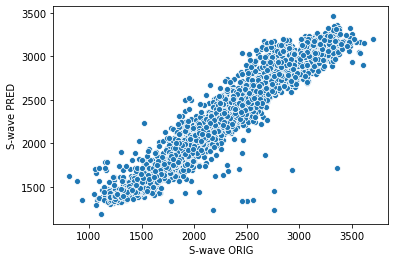

In [210]:
sns.scatterplot(x='S-wave ORIG',y='S-wave PRED',data=pred_df_ct2)

In [213]:
#SUMMARY Report
print('FINAL REPORT "MODEL - ct2"','\n')

#mencari MSE
#MSE hasilnya akan sama saat model.evaluate(X_test,y_test,verbose=1)
mse = mean_squared_error(pred_df_ct2['S-wave ORIG'],pred_df_ct2['S-wave PRED'])
print ('Mean Squeared Error: ',mse)
#mencari RMSE 
rmse = np.sqrt(mean_squared_error(pred_df_ct2['S-wave ORIG'],pred_df_ct2['S-wave PRED']))
print ('Root Mean Squeared Error: ',rmse)
#mencari MAE
mae = mean_absolute_error(pred_df_ct2['S-wave ORIG'],pred_df_ct2['S-wave PRED'])
print ('Mean Absolute Error: ',mae)
print ('\n')
#mencari nilai keakuratan
evs = explained_variance_score(pred_df_ct2['S-wave ORIG'],pred_df_ct2['S-wave PRED'])
print ('Explained Variance Score: ',evs)

FINAL REPORT "MODEL - ct2" 

Mean Squeared Error:  21580.3907403065
Root Mean Squeared Error:  146.90265736298474
Mean Absolute Error:  101.17220802494965


Explained Variance Score:  0.9180966850040407
